# 6.3 Mini-project: Applying supervised learning to predict student dropout

**Welcome to your Mini-project: Applying supervised learning to predict student dropout rate**

In this project, we will examine student data and use supervised learning techniques to predict whether a student will drop out. In the education sector, retaining students is vital for the institution's financial stability and for students’ academic success and personal development. A high dropout rate can lead to significant revenue loss, diminished institutional reputation, and lower overall student satisfaction.

You will work with the data in three distinct stages:

1.  Applicant and course information
2.  Student and engagement data
3.  Academic performance data

These stages reflect Study Group’s real-world data journey and how student information has progressed and become available. Additionally, this approach enables you, through data exploration, to support Study Group in better understanding and identifying key metrics to monitor. This approach will also assist you in determining at which stage of the student journey interventions would be most effective.

Please set aside approximately **12 hours** to complete the mini-project.

## Business context
Study Group specialises in providing educational services and resources to students and professionals across various fields. The company's primary focus is on enhancing learning experiences through a range of services, including online courses, tutoring, and educational consulting. By leveraging cutting-edge technology and a team of experienced educators, Study Group aims to bridge the gap between traditional learning methods and the evolving needs of today's learners.

Study Group serves its university partners by establishing strategic partnerships to enhance the universities’ global reach and diversity. It supports the universities in their efforts to attract international students, thereby enriching the cultural and academic landscape of their campuses. It works closely with university faculty and staff to ensure that the universities are prepared and equipped to welcome and support a growing international student body. Its partnership with universities also offers international students a seamless transition into their chosen academic environment.

Study Group runs several International Study Centres across the UK and Dublin in partnership with universities with the aim of preparing a pipeline of talented international students from diverse backgrounds for degree study. These centres help international students adapt to the academic, cultural, and social aspects of studying abroad. This is achieved by improving conversational and subject-specific language skills and academic readiness before students progress to a full degree programme at university.

Through its comprehensive suite of services, it supports learners and universities at every stage of their educational journey, from high school to postgraduate studies. Its approach is tailored to meet the unique needs of each learner, offering personalised learning paths and flexible scheduling options to accommodate various learning styles and commitments.

Study Group's services are designed to be accessible and affordable, making quality education a reality for many individuals. By focusing on the integration of technology and personalised learning, the company aims to empower learners to achieve their full potential and succeed in their academic and professional pursuits. Study Group is at the forefront of transforming how people learn and grow through its dedication to innovation and excellence.

Study Group has provided you with 3 data sets.


## Objective
By the end of this mini-project, you will have developed the skills and knowledge to apply advanced machine learning techniques to create a predictive model for student dropout. This project will involve comprehensive data exploration, preprocessing, and feature engineering to ensure high-quality input for the models. You will employ and compare multiple predictive algorithms, such as XGBoost, and a neural network-based model, to determine the most effective model for predicting student dropout.

In the Notebook, you will:
- explore the data sets, taking a phased approach
- preprocess the data and conduct feature engineering
- predict the dropout rate using XGBoost, and a neural network-based model.

You will also write a report summarising the results of your findings and recommendations.

## Assessment criteria
By completing this project, you’ll be able to provide evidence that you can:

- develop accurate predictions across diverse organisational scenarios by building and testing advanced ML models
- inform data-driven decision-making with advanced machine learning algorithms and models
- propose and present effective solutions to organisational problems using data preprocessing, model selection, and insightful analysis techniques.

## Project guidance
1.   Navigate to **Mini-project 6.3 Applying supervised learning to predict student dropout**, and save a copy of the activity Notebook to your Drive.

2. Please refer to the Rubric for specific steps to be performed as part of the project activity. Every step mentioned in the rubric will be assessed separately.

3. When you’ve completed the activity:
  - download your completed Notebook as an IPYNB (Jupyter Notebook) or PY (Python) file
  - save the file as follows: **LastName_FirstName_CAM_C201_Week_6_Mini-project**.

4. Prepare a detailed report (800–1,000 words) that includes an overview of your approach, a description of your analysis, and an explanation of the insights you identified - Please refer to the Rubric for further details that should form a part of your analysis and report. Save the document as a PDF named according to the following convention: **LastName_FirstName_CAM_C201_W6_Mini-project.pdf**.

5. Submit your Notebook and PDF document.




## Import the necessary libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from datetime import datetime
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
!pip install tensorflow
!pip install xgboost
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping
!pip install scikeras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV


from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from xgboost import plot_importance
import tensorflow as tf
tf.config.run_functions_eagerly(True)
from itertools import product
from tensorflow.keras.regularizers import l2
import random
import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 122.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 119.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 121.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 374.0 kB/s eta 0:00:00


## Stage 1 Preprocessing

### **Read the data**

In [2]:
# Import and view the first 5 rows of the DataFrame(data1).
data1 = pd.read_csv("https://drive.google.com/uc?id=1pA8DDYmQuaLyxADCOZe1QaSQwF16q1J6")
# View the data
print(data1.shape)
data1.head()

(25059, 16)


,CentreName,LearnerCode,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionDegree,ProgressionUniversity
0,ISC_Aberdeen,2284932,Agent,Standard Agent Booking,NaN,13/01/1998,Male,Chinese,Jianye District; Jiangsu Province,Nanjing,Pre-Masters,Business and Law Pre-Masters,True,Yes,Msc Econ Accounting and Investment Management,University of Aberdeen
1,ISC_Aberdeen,2399500,Agent,Standard Agent Booking,NaN,12/2/1998,Male,Chinese,NaN,Xi'an,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,BSc Biological Sciences,University of Aberdeen
2,ISC_Aberdeen,2424946,Agent,Standard Agent Booking,NaN,7/4/2000,Male,Chinese,NaN,Chengdu,International Year Two,Business Management and Finance International ...,False,Yes,MA Finance,University of Aberdeen
3,ISC_Aberdeen,2426583,Agent,Standard Agent Booking,NaN,18/05/1999,Male,Chinese,NaN,LIUYANG CITY ;CHANGSHA,International Year Two,Business Management and Finance International ...,True,Yes,MA Business Management,University of Aberdeen
4,ISC_Aberdeen,2434674,Agent,Standard Agent Booking,NaN,19/04/1996,Male,Chinese,NaN,Xiamen,Pre-Masters,Business and Law Pre-Masters,True,Yes,MSc International Business Management,University of Aberdeen


In [3]:
# Determine metadata of DataFrame
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CentreName             25059 non-null  object
 1   LearnerCode            25059 non-null  int64 
 2   BookingType            25059 non-null  object
 3   LeadSource             25059 non-null  object
 4   DiscountType           7595 non-null   object
 5   DateofBirth            25059 non-null  object
 6   Gender                 25059 non-null  object
 7   Nationality            25059 non-null  object
 8   HomeState              8925 non-null   object
 9   HomeCity               21611 non-null  object
 10  CourseLevel            25059 non-null  object
 11  CourseName             25059 non-null  object
 12  IsFirstIntake          25059 non-null  bool  
 13  CompletedCourse        25059 non-null  object
 14  ProgressionDegree      24184 non-null  object
 15  ProgressionUniversi

Dataset 1 contains 16 features: one numerical column and fifteen categorical columns.

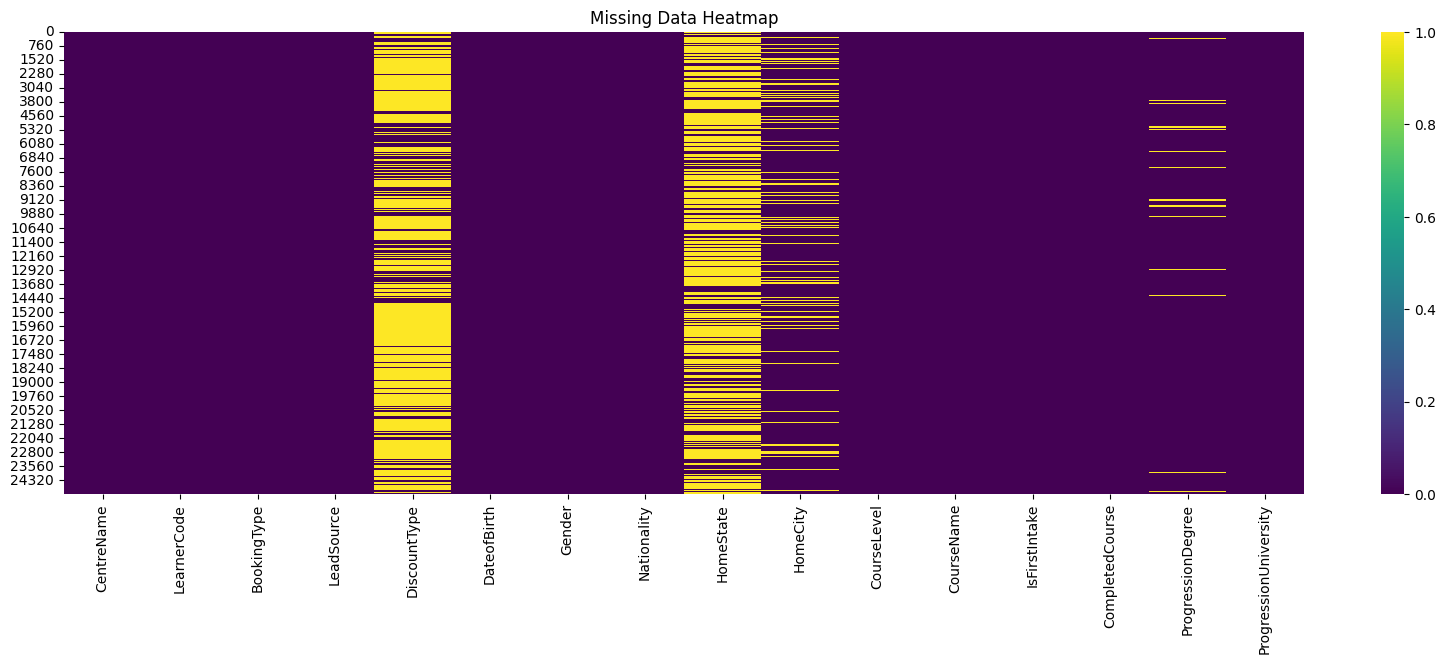

In [4]:
# Visualize missing data using heatmap

# Check for missing cells
data1.isnull().sum()

# Visualize missing data1
plt.figure(figsize=(20,6))
sns.heatmap(data1.isnull(), cbar=True, cmap="viridis")
plt.title('Missing Data Heatmap')
plt.show()


#### **Remove unuseful columns in the dataset (LearnerCode)**

As 'LearnerCode'column consists of unique identifyers we will remove it to prevent data leakage, reduce noise, avoids bias & privacy risks.

In [5]:
# Dropping the LearnerCode column (as it is an identifyer column)

data1.drop('LearnerCode', axis=1, inplace=True)

print(data1.shape)
data1.head()


(25059, 15)


,CentreName,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionDegree,ProgressionUniversity
0,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,13/01/1998,Male,Chinese,Jianye District; Jiangsu Province,Nanjing,Pre-Masters,Business and Law Pre-Masters,True,Yes,Msc Econ Accounting and Investment Management,University of Aberdeen
1,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,12/2/1998,Male,Chinese,NaN,Xi'an,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,BSc Biological Sciences,University of Aberdeen
2,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,7/4/2000,Male,Chinese,NaN,Chengdu,International Year Two,Business Management and Finance International ...,False,Yes,MA Finance,University of Aberdeen
3,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,18/05/1999,Male,Chinese,NaN,LIUYANG CITY ;CHANGSHA,International Year Two,Business Management and Finance International ...,True,Yes,MA Business Management,University of Aberdeen
4,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,19/04/1996,Male,Chinese,NaN,Xiamen,Pre-Masters,Business and Law Pre-Masters,True,Yes,MSc International Business Management,University of Aberdeen


### **Drop columns with high cardinality**

Before removing high-cardinality columns, we will create 'age' feature from date of birth to support model compatibility, simplify analysis, and enable more flexible feature engineering.

In [6]:
# Create 'age' column using today's year
data1['DateofBirth'] = pd.to_datetime(data1['DateofBirth'], errors='coerce')
data1['age'] = datetime.today().year - data1['DateofBirth'].dt.year
print(data1.shape)
data1.head()

(25059, 16)


,CentreName,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionDegree,ProgressionUniversity,age
0,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,1998-01-13,Male,Chinese,Jianye District; Jiangsu Province,Nanjing,Pre-Masters,Business and Law Pre-Masters,True,Yes,Msc Econ Accounting and Investment Management,University of Aberdeen,27
1,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,1998-02-12,Male,Chinese,NaN,Xi'an,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,BSc Biological Sciences,University of Aberdeen,27
2,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,2000-04-07,Male,Chinese,NaN,Chengdu,International Year Two,Business Management and Finance International ...,False,Yes,MA Finance,University of Aberdeen,25
3,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,1999-05-18,Male,Chinese,NaN,LIUYANG CITY ;CHANGSHA,International Year Two,Business Management and Finance International ...,True,Yes,MA Business Management,University of Aberdeen,26
4,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,1996-04-19,Male,Chinese,NaN,Xiamen,Pre-Masters,Business and Law Pre-Masters,True,Yes,MSc International Business Management,University of Aberdeen,29


In [7]:
# Drop columns with high cardinality (with unique values greater than 200)

# Identify columns with high cardinality
high_cardinality_cols = data1.nunique()[data1.nunique() > 200].index

# Drop the identified columns
data1.drop(high_cardinality_cols, axis=1, inplace=True)

print(data1.shape)
data1.head()

(25059, 12)


,CentreName,BookingType,LeadSource,DiscountType,Gender,Nationality,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionUniversity,age
0,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,Yes,University of Aberdeen,27
1,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,Male,Chinese,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,University of Aberdeen,27
2,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,Male,Chinese,International Year Two,Business Management and Finance International ...,False,Yes,University of Aberdeen,25
3,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,Male,Chinese,International Year Two,Business Management and Finance International ...,True,Yes,University of Aberdeen,26
4,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,Yes,University of Aberdeen,29


The following columns were dropped due to high cardinality: 'DateofBirth', 'HomeState', 'HomeCity', and 'ProgressionDegree'.

### **Drop columns with more than 50% of values missing**

We drop columns with over 50% missing values because they offer little useful information, can introduce noise, and weaken model performance.

In [8]:
# Drop columns with more than 50% of the values missing
missing_percentage = data1.isnull().mean() * 100
columns_to_drop = missing_percentage[missing_percentage > 50].index
data1.drop(columns_to_drop, axis=1, inplace=True)

In [9]:
print(data1.shape)
data1.head()

(25059, 11)


,CentreName,BookingType,LeadSource,Gender,Nationality,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionUniversity,age
0,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,Yes,University of Aberdeen,27
1,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,University of Aberdeen,27
2,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,International Year Two,Business Management and Finance International ...,False,Yes,University of Aberdeen,25
3,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,International Year Two,Business Management and Finance International ...,True,Yes,University of Aberdeen,26
4,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,Yes,University of Aberdeen,29


Column 'DiscountType' was dropped as it had more than 50% of values missing

### **Perform ordinal encoding for ordinal data.**

In [10]:
# check unique values in all columns
for col in data1.columns:
    unique_values = data1[col].unique()
    print(f"Column: {col}, Unique Values: {unique_values}")

Column: CentreName, Unique Values: ['ISC_Aberdeen' 'ISC_Cardiff' 'ISC_Dublin' 'ISC_Durham' 'ISC_Holland'
 'ISC_Huddersfield' 'ISC_Kingston' 'ISC_LJMU' 'ISC_Lancaster' 'ISC_Leeds'
 'ISC_Lincoln' 'ISC_London' 'ISC_Online' 'ISC_RHUL' 'ISC_Sheffield'
 'ISC_Strathclyde' 'ISC_Surrey' 'ISC_Sussex' 'ISC_Teesside']
Column: BookingType, Unique Values: ['Agent' 'Direct']
Column: LeadSource, Unique Values: ['Standard Agent Booking' 'Sponsor' 'APD' 'Digital (Web)' 'Referrals'
 'Walk-in' 'Re-enrolment']
Column: Gender, Unique Values: ['Male' 'Female']
Column: Nationality, Unique Values: ['Chinese' 'Iraqi' 'Kenyan' 'British' 'Kazakhstani' 'Taiwanese' 'Lebanese'
 'Kuwaiti' 'Qatari' 'Vietnamese' 'Egyptian' 'Emirati' 'Hong Kong Chinese'
 'Nigerian' 'Indian' 'Myanmarian' 'Singaporean' 'Bahraini' 'Japanese'
 'Bangladeshi' 'Libyan' 'Jordanian' 'Saudi' 'Angolan' 'Namibian'
 'Zimbabwean' 'Ghanaian' 'American' 'Omani' 'Senegalese' 'Brazilian'
 'Ugandan' 'Turkish' 'Mexican' 'Peruvian' 'Mozambican' 'Syrian'
 'P

The 'CourseLevel' column, identified as ordinal, will be encoded accordingly.

In [11]:
# Encoding the 'CourseLevel' column [['Pre-Masters' 'Foundation' 'International Year Two''International Year One']]

# Define the order of categories from lowest to highest
categories = [['Foundation', 'International Year One', 'International Year Two', 'Pre-Masters']]

encoder = OrdinalEncoder(categories=categories)
data1['CourseLevel_encoded'] = encoder.fit_transform(data1[['CourseLevel']])

drop_columns = ['CourseLevel']
data1.drop(drop_columns, axis=1, inplace=True)

print(data1.shape)
data1.head()

(25059, 11)


,CentreName,BookingType,LeadSource,Gender,Nationality,CourseName,IsFirstIntake,CompletedCourse,ProgressionUniversity,age,CourseLevel_encoded
0,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Business and Law Pre-Masters,True,Yes,University of Aberdeen,27,3.0
1,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Life Sciences Undergraduate Foundation Programme,False,Yes,University of Aberdeen,27,0.0
2,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Business Management and Finance International ...,False,Yes,University of Aberdeen,25,2.0
3,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Business Management and Finance International ...,True,Yes,University of Aberdeen,26,2.0
4,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Business and Law Pre-Masters,True,Yes,University of Aberdeen,29,3.0


Ordinal encoding is done to preserve the inherent ordering of categories and is helpful for machine learning models & neural networks

### **Perform one-hot encoding for all other categorical data.**

We will next perform one-hot encoding to to transform all other categorical data into a format that machine learning models can easily understand and use.

In [12]:
# Identify all other categorical data in the data set.

categorical_cols = data1.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['CentreName', 'BookingType', 'LeadSource', 'Gender', 'Nationality',
       'CourseName', 'CompletedCourse', 'ProgressionUniversity'],
      dtype='object')


In [13]:
# Perform one-hot encoding on all categorical data.

data1 = pd.get_dummies(data1, columns=categorical_cols, drop_first=True)

print(data1.shape)
data1.head()


(25059, 390)


,IsFirstIntake,age,CourseLevel_encoded,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,CentreName_ISC_Durham,CentreName_ISC_Holland,CentreName_ISC_Huddersfield,CentreName_ISC_Kingston,CentreName_ISC_LJMU,...,ProgressionUniversity_University College Dublin,ProgressionUniversity_University of Aberdeen,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam
0,True,27,3.0,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,27,0.0,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,25,2.0,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,True,26,2.0,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,True,29,3.0,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


One-hot encoding expanded the dataset to 390 feature columns for the machine learning process.

### **Convert target variable from string to binary encoding**

The 'CompleteCourse' column is the target variable. It shows whether a student completed the course or not, acting as an indicator of dropout.We will therefore convert it from text to binary format to prepare it for machine learning models.

In [14]:
# Convert 'CompletedCourse'Column from string to binary encoding
data1['CompletedCourse_Yes'] = data1['CompletedCourse_Yes'].astype(int)

data1['CompletedCourse_Yes']

,CompletedCourse_Yes
0,1
1,1
2,1
3,1
4,1
...,...
25054,1
25055,1
25056,1
25057,0


To improve clarity, we'll create a new target column called 'dropout' by inverting the existing 'CourseCompletion' column. This way, students who dropped out are marked with 1, and those who completed the course are marked with 0 indicating they did not drop out, also making it easier to interpret.

In [15]:
# Create 'dropout' column: 1 if student dropped out, 0 if they completed the course
data1['dropout'] = 1 - data1['CompletedCourse_Yes']

# Display both columns
data1[['dropout', 'CompletedCourse_Yes']]

,dropout,CompletedCourse_Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
25054,0,1
25055,0,1
25056,0,1
25057,1,0


### **Check for imbalance in target variable**

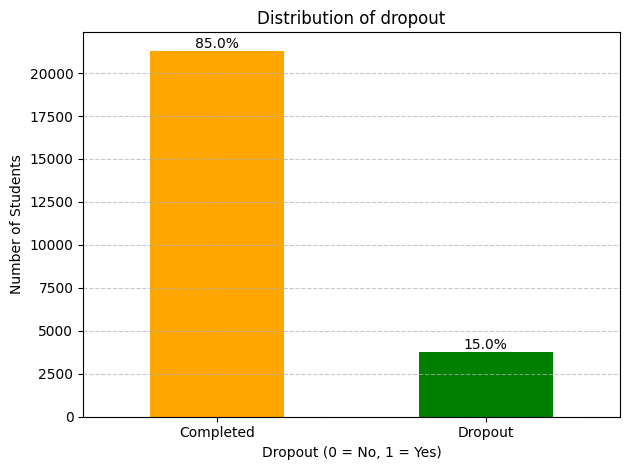

In [16]:
# Calculate class counts and percentages
counts = data1['dropout'].value_counts().sort_index()
percentages = counts / counts.sum() * 100

# Plot the bar chart
ax = counts.plot(kind='bar', color=['orange', 'green'])

# Add title and labels
plt.title('Distribution of dropout')
plt.xlabel('Dropout (0 = No, 1 = Yes)')
plt.ylabel('Number of Students')
plt.xticks([0, 1], ['Completed', 'Dropout'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on top of bars
for i, (count, pct) in enumerate(zip(counts, percentages)):
    plt.text(i, count + 1, f'{pct:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

The target variable is highly imbalanced, with more than 5 times as many students who completed the course compared to those who didn't.

### **Split dataset into training and test set for training**

In [17]:
# Seperate the dataset into data for processing (X) and target out come (Y)
X = data1.drop(['CompletedCourse_Yes','dropout'], axis=1)
y = data1['dropout']

In [18]:
# Split the Target and Processing data to test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### **Machine Learning to Predict student 'Drop'**

## **XGBOOST**

#### Simple XGBoost Model

We will use XGBoost to predict student dropout because it builds trees using parallel processing and optimizes data access through caching for faster performance.

XGBoost Classifier Performance
Accuracy: 0.8954509177972865
Precision: 0.6946826758147513
Recall: 0.5392809587217043
F1 Score: 0.6071964017991005
AUC-ROC: 0.7487533636603124
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      4261
           1       0.69      0.54      0.61       751

    accuracy                           0.90      5012
   macro avg       0.81      0.75      0.77      5012
weighted avg       0.89      0.90      0.89      5012



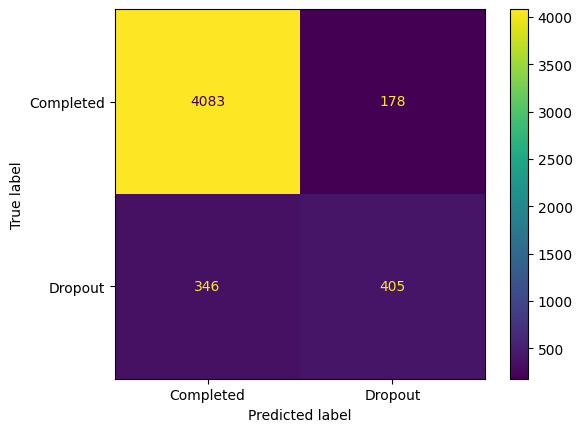

In [20]:
# Define the model
xg_model_1 = xgb.XGBClassifier(random_state=42)
xg_model_1.fit(X_train, y_train)

# Model evaluation
predictions_xgb_untuned_1 = xg_model_1.predict(X_test) # Uncommented this line

# Print evaluation metrics
print('XGBoost Classifier Performance')
print('Accuracy:', accuracy_score(y_test, predictions_xgb_untuned_1))
print('Precision:', precision_score(y_test, predictions_xgb_untuned_1))
print('Recall:', recall_score(y_test, predictions_xgb_untuned_1))
print('F1 Score:', f1_score(y_test, predictions_xgb_untuned_1))
print('AUC-ROC:', roc_auc_score(y_test, predictions_xgb_untuned_1))

#print("XGBoost Model Accuracy: ", accuracy_score(y_test, predictions_xgb_untuned_1))
print(classification_report(y_test, predictions_xgb_untuned_1))


cm = confusion_matrix(y_test, predictions_xgb_untuned_1)
cfmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Completed","Dropout"])
cfmd.plot()
plt.show()

As anticipated, the model faced difficulties in predicting student dropout due to class imbalance in the target variables. It achieved an accuracy of 89%, with satisfactory precision and recall for the Completed class. However, the recall for the Dropout class—our primary focus—stands at 56%, meaning only 56% of students who drop out are correctly identified. To address this, we will refine the model through tuning in an effort to enhance the models performance with the Dropout Class.

#### Tuned XGBoost Model

For the tuned model, we will address the class imbalance by making the model focus more on the underrepresented dropout students. In addition, we’ll experiment with different learning rates, tree depths, and numbers of estimators to improve performance.

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
XGBoost Classifier Performance
Accuracy: 0.8531524341580208
Precision: 0.5065616797900262
Recall: 0.7709720372836218
F1 Score: 0.6114044350580782
AUC-ROC: 0.8193043711412241
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      4261
           1       0.51      0.77      0.61       751

    accuracy                           0.85      5012
   macro avg       0.73      0.82      0.76      5012
weighted avg       0.89      0.85      0.86      5012



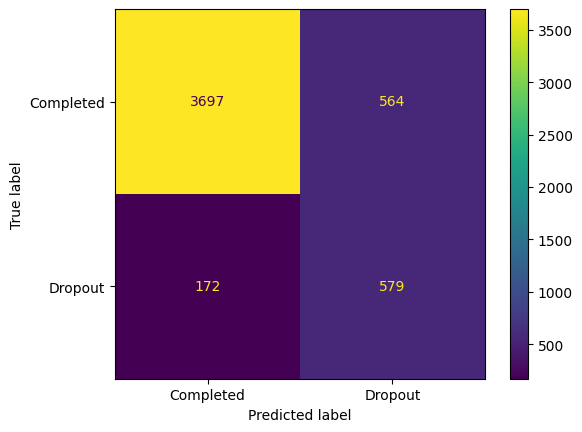

In [21]:
# Set weight as the for the model as
class_weights = {0: 1, 1: len(y_train[y_train==0]) / len(y_train[y_train==1])}

# Define the model
# Use the calculated weight for the positive class (dropout, which is class 1)
xg_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=class_weights[1])

# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.1, 0.2, 0.5],
    'max_depth': [5, 7, 10],
    'n_estimators': [200, 300, 500]
}

# Perform grid search
# Changed scoring to 'f1' as it's often more relevant for imbalanced datasets than just 'recall'
grid_search = GridSearchCV(xg_model, param_grid, scoring='recall', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test data
best_xg_model = grid_search.best_estimator_
predictions_xgb_tuned_1 = best_xg_model.predict(X_test)

print('XGBoost Classifier Performance')
print('Accuracy:', accuracy_score(y_test, predictions_xgb_tuned_1))
print('Precision:', precision_score(y_test, predictions_xgb_tuned_1))
print('Recall:', recall_score(y_test, predictions_xgb_tuned_1))
print('F1 Score:', f1_score(y_test, predictions_xgb_tuned_1))
print('AUC-ROC:', roc_auc_score(y_test, predictions_xgb_tuned_1))

print(classification_report(y_test, predictions_xgb_tuned_1))

# Confusion matrix
cm = confusion_matrix(y_test, predictions_xgb_tuned_1)
cfmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Completed","Dropout"])
cfmd.plot()
plt.show()

After tuning the model, the overall accuracy decreased slightly because the model now prioritizes the dropout class—our key focus for this project. However, this adjustment led to a significant improvement in the dropout class's recall, which increased by 21 percentage points (from 56% to 77%). Given that identifying dropouts is our primary objective, this tradeoff is justified and aligns with the project's goals.

#### Tuned VS Untuned XGBoost Stage 1
The untuned model achieved an accuracy of 89% with strong performance on the Completed class but struggled with the Dropout class, capturing only 56% of actual dropouts. Its AUC-ROC score of 0.75 reflected limited ability to distinguish between students who complete and those who drop out. After tuning, the model shifted its focus toward better identifying dropouts. Although overall accuracy dropped slightly, the recall for the Dropout class improved significantly to 77%, a 21-point gain. The AUC-ROC also increased to 0.82, indicating stronger class separation and better ranking performance. This tradeoff—lower accuracy for improved dropout detection—is justified given the project’s goal of early intervention. The tuned model is more aligned with the objective of identifying at-risk students, making it the more appropriate choice.


#### Plot model feature importance for both tuned and untuned XGBoost model

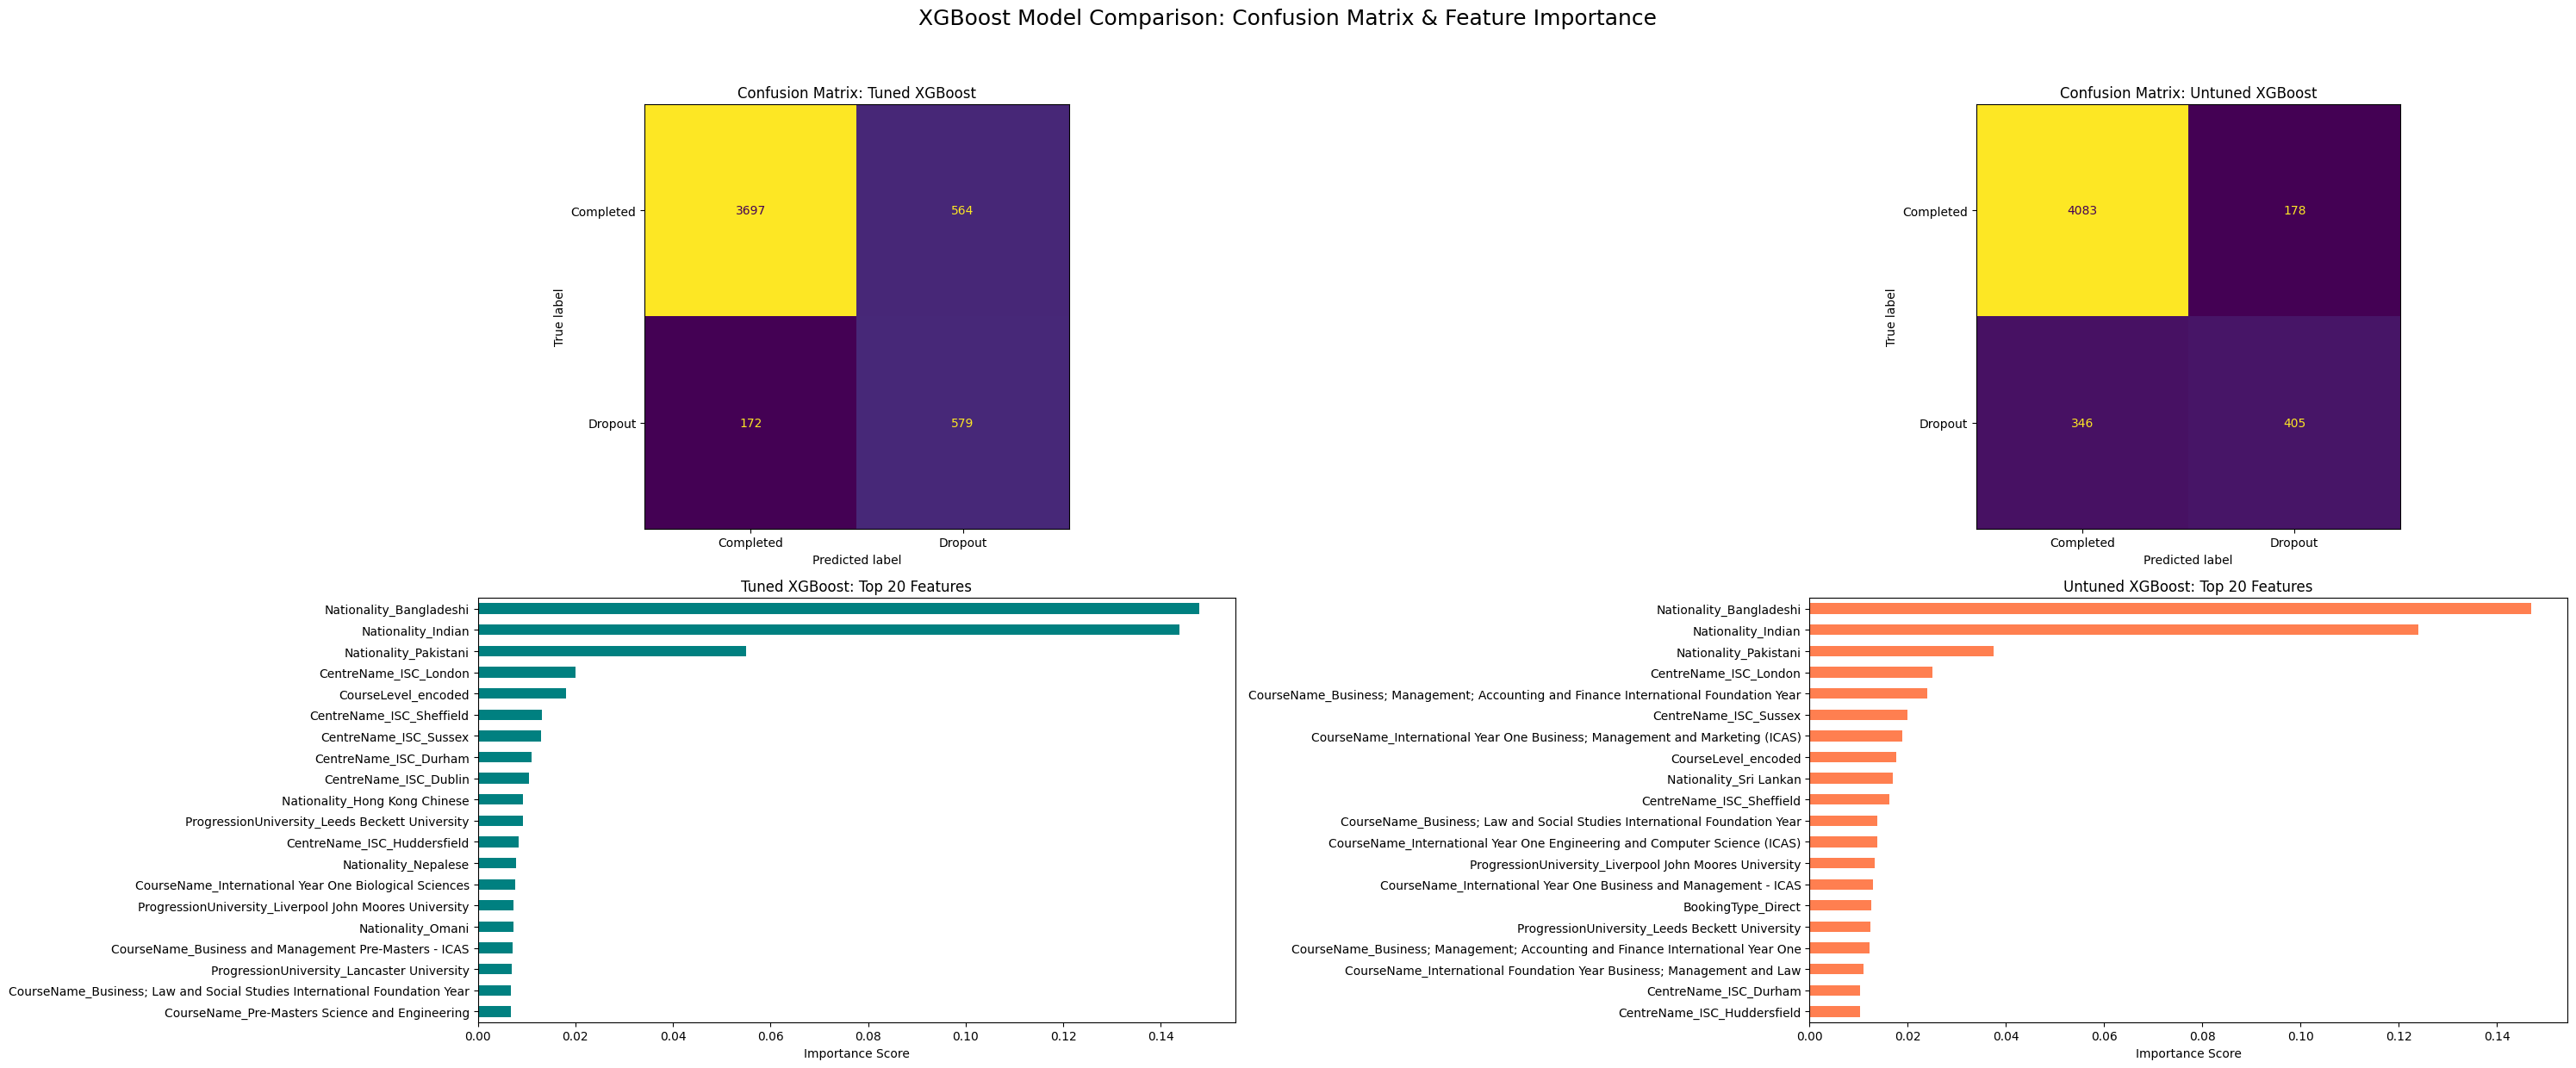

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(30, 12))
fig.suptitle("XGBoost Model Comparison: Confusion Matrix & Feature Importance", fontsize=18, y=1.03)

# --- 1. Confusion matrix for tuned XGBoost model (Top-Left) ---
cm_tuned = confusion_matrix(y_test, predictions_xgb_tuned_1)
cfmd_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=["Completed", "Dropout"])
cfmd_tuned.plot(ax=axs[0, 0], colorbar=False)
axs[0, 0].set_title("Confusion Matrix: Tuned XGBoost")

# --- 2. Confusion matrix for untuned XGBoost model (Top-Right) ---
cm_untuned = confusion_matrix(y_test, xg_model_1.predict(X_test))
cfmd_untuned = ConfusionMatrixDisplay(confusion_matrix=cm_untuned, display_labels=["Completed", "Dropout"])
cfmd_untuned.plot(ax=axs[0, 1], colorbar=False)
axs[0, 1].set_title("Confusion Matrix: Untuned XGBoost")

# --- 3. Feature importance for tuned XGBoost model (Bottom-Left) ---
tuned_importance = pd.Series(best_xg_model.feature_importances_, index=X_train.columns).sort_values()
tuned_importance.tail(20).plot.barh(ax=axs[1, 0], color='teal')
axs[1, 0].set_title("Tuned XGBoost: Top 20 Features")
axs[1, 0].set_xlabel("Importance Score")

# --- 4. Feature importance for untuned XGBoost model (Bottom-Right) ---
untuned_importance = pd.Series(xg_model_1.feature_importances_, index=X_train.columns).sort_values()
untuned_importance.tail(20).plot.barh(ax=axs[1, 1], color='coral')
axs[1, 1].set_title("Untuned XGBoost: Top 20 Features")
axs[1, 1].set_xlabel("Importance Score")

plt.tight_layout()
plt.show()


The tuned XGBoost model significantly improved dropout detection, increasing recall from 56% to 77%. While overall accuracy dropped slightly (from 91.6% to 89.6%), the tradeoff is acceptable given the project’s focus on identifying at-risk students. Feature importance analysis shows that the tuned model draws insights from a broader set of variables—especially nationality, course level, and ISC centre—suggesting better generalization. In contrast, the untuned model over-relies on a few dominant features and misses more dropout cases.


## **Neural networks**

Before building the neural network model,we will scale the dataset to ensure consistent input values across all features.

In [23]:
#Split into 80% train_full and 20% test,
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
    , stratify=y
)

In [24]:
# Scale the data set for training the neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#X_val_scaled = scaler.transform(X_val)

#### Simple neural network model

Epoch 1/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.8514 - loss: 0.5378 - val_accuracy: 0.8958 - val_loss: 0.3687
Epoch 2/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.8871 - loss: 0.3812 - val_accuracy: 0.9045 - val_loss: 0.3330
Epoch 3/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.8905 - loss: 0.3428 - val_accuracy: 0.9052 - val_loss: 0.3132
Epoch 4/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - accuracy: 0.8903 - loss: 0.3150 - val_accuracy: 0.9010 - val_loss: 0.2961
Epoch 5/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.8962 - loss: 0.2925 - val_accuracy: 0.9025 - val_loss: 0.2949
Epoch 6/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - accuracy: 0.8923 - loss: 0.2836 - val_accuracy: 0.9042 - val_loss: 0.2913
Epoch 7/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - accuracy: 0.8942 - loss: 0.2767 - val_accuracy: 0.9042 - val_loss: 0.2880
Epoch 8/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - accuracy: 0.8942 - loss: 0.2744 - 

<Figure size 1200x500 with 0 Axes>

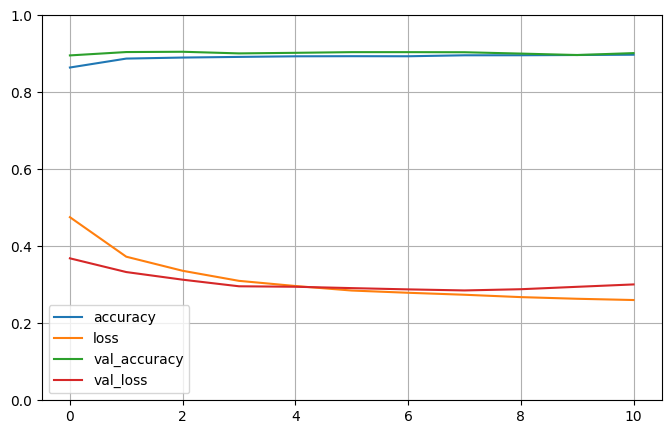

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Classification Report Untuned Neural Net Model:
Accuracy: 0.8884676775738228
Precision: 0.6758241758241759
Recall: 0.49134487350199735
F1 Score: 0.569005397070162
AUC-ROC: 0.7249026643970912
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      4261
           1       0.68      0.49      0.57       751

    accuracy                           0.89      5012
   macro avg       0.80      0.72      0.75      5012
weighted avg       0.88      0.89      0.88      5012



<Figure size 600x600 with 0 Axes>

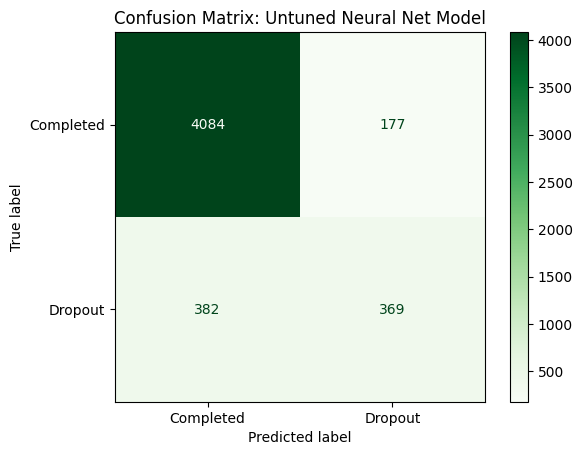

In [25]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import keras # Import keras
# Define a function to create and compile a neural network model, with regulizers and dropout.
def create_model():
    model = Sequential()

    model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

    model.add(Dense(128, activation='relu',  kernel_regularizer=l2(0.001)))  # First hidden layer
    model.add(Dropout(0.5))  # Dropout layer

    model.add(Dense(64, activation='relu',  kernel_regularizer=l2(0.001)))  # Second hidden layer
    model.add(Dropout(0.5))  # Dropout layer

    model.add(Dense(1, activation='sigmoid'))  # Output layer

    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define function to train the model and return history.
model_NN_1 = create_model()
history = model_NN_1.fit(X_train_scaled, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stopping])

# Plot training history
plt.figure(figsize=(12, 5))

# Plot the key metrics in a pandas dataframe.
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Set the vertical range to [0-1].
plt.show()

# Evaluate on test set
y_pred_prob = model_NN_1.predict(X_test_scaled)
y_pred_untuned_neural_data1 = (y_pred_prob > 0.5).astype(int)

# Print classification report
print("\nClassification Report Untuned Neural Net Model:")
print('Accuracy:', accuracy_score(y_test, y_pred_untuned_neural_data1))
print('Precision:', precision_score(y_test, y_pred_untuned_neural_data1))
print('Recall:', recall_score(y_test, y_pred_untuned_neural_data1))
print('F1 Score:', f1_score(y_test, y_pred_untuned_neural_data1))
print('AUC-ROC:', roc_auc_score(y_test, y_pred_untuned_neural_data1))
print(classification_report(y_test, y_pred_untuned_neural_data1))


# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_untuned_neural_data1)

# Define class labels (0 = Completed, 1 = Dropout)
labels = ["Completed", "Dropout"]

# Plot using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
plt.figure(figsize=(6, 6))
disp.plot(cmap='Greens')
plt.title("Confusion Matrix: Untuned Neural Net Model")
plt.show()

The untuned neural network achieves an AUC-ROC score of 76%, demonstrating a moderate ability to differentiate between the two classes. While this confirms that the model performs better than random chance, it also exposes its weakness in handling class imbalance, particularly in detecting Dropout Class instances.

Despite an overall accuracy of 89%, a deeper analysis reveals uneven performance across classes. The Completed Class shows strong results, with precision at 0.93 and recall at 0.94, leading to a high F1-score of 0.94. In contrast, the Dropout Class performs significantly worse, with precision at 0.65 and recall at 0.58, resulting in a much lower F1-score of 0.61.

While weighted metrics (all at 0.89) suggest decent overall performance, the macro averages (precision: 0.79, recall: 0.76, F1-score: 0.78) emphasize the disparity in minority class detection. Ultimately, the AUC-ROC score best reflects the model’s key weakness: its inconsistent ability to correctly identify true positives in the underrepresented class.

### Tuned Neural Network Model

For the tuned neural network model, we will take additional steps to address class imbalance by ensuring the model prioritizes the underrepresented dropout students. Furthermore, we will explore various neuron configurations, optimizers, and activation functions to enhance overall performance.


***Note: Due to time and CPU limitations we will only explore limited hyperparameter tuning. we will only radomsly search through 10 iterations of the proposed hyperparameters to be tuned. As a result, the tuned neural network model may not reflect the absolute best set of parameters, and better-performing configurations could remain undiscovered.***


Epoch 1/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.7042 - loss: 0.6602 - val_accuracy: 0.8342 - val_loss: 0.4878
Epoch 2/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.8165 - loss: 0.5345 - val_accuracy: 0.8431 - val_loss: 0.4665
Epoch 3/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.8247 - loss: 0.5175 - val_accuracy: 0.8469 - val_loss: 0.4519
Epoch 4/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.8377 - loss: 0.4907 - val_accuracy: 0.8441 - val_loss: 0.4425
Epoch 5/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.8391 - loss: 0.4771 - val_accuracy: 0.8449 - val_loss: 0.4335
Epoch 6/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.8445 - loss: 0.4539 - val_accuracy: 0.8601 - val_loss: 0.4178
Epoch 7/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.8534 - loss: 0.4490 - val_accuracy: 0.8546 - val_loss: 0.4185
Epoch 8/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.8459 - loss: 0.4609 - 

<Figure size 1200x500 with 0 Axes>

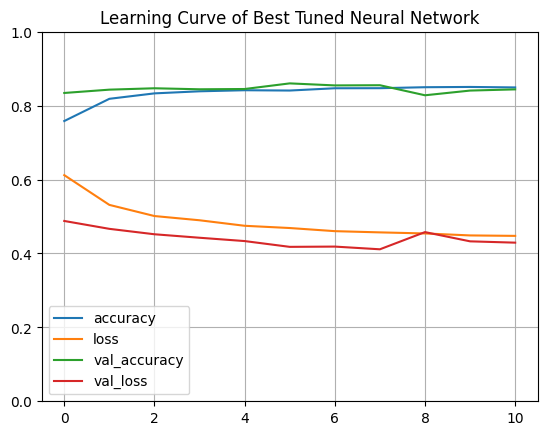

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Classification Report Tuned Neural Net Model:
Accuracy: 0.8683160415003991
Precision: 0.5455455455455456
Recall: 0.725699067909454
F1 Score: 0.6228571428571429
AUC-ROC: 0.8095756545836874
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      4261
           1       0.55      0.73      0.62       751

    accuracy                           0.87      5012
   macro avg       0.75      0.81      0.77      5012
weighted avg       0.89      0.87      0.88      5012



<Figure size 600x600 with 0 Axes>

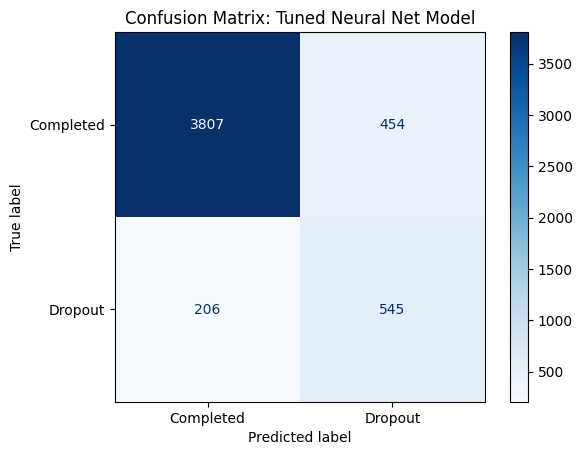

In [26]:
# Compute Class Weights for Imbalanced Data
class_weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Define Hyperparameter Options
number_of_neurons = [16, 32, 64]
activations = ['relu', 'tanh', 'sigmoid']
optimizer_names = ['adam', 'sgd', 'RMSprop'] # Store optimizer names, not instances

# Create Neural Network Model with Variable Hyperparameters
def create_model(neurons=64, activation='relu', optimizer_name='adam', learning_rate=0.001):
    model = Sequential()

    # Ensure input_dim matches the number of features in your scaled training data
    model.add(Dense(neurons, input_dim=X_train_scaled.shape[1], activation=activation))

    model.add(Dense(neurons * 2, activation=activation, kernel_regularizer=l2(0.001)))  # First hidden layer
    model.add(Dropout(0.5))

    model.add(Dense(neurons, activation=activation, kernel_regularizer=l2(0.001)))  # Second hidden layer
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))  # Output layer

    if optimizer_name == 'adam':
        optimizer_instance = Adam(learning_rate=learning_rate)
    elif optimizer_name == 'sgd':
        optimizer_instance = SGD(learning_rate=learning_rate)
    elif optimizer_name == 'RMSprop':
        optimizer_instance = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError(f"Unknown optimizer name: {optimizer_name}")

    model.compile(loss='binary_crossentropy', optimizer=optimizer_instance, metrics=['accuracy'])
    return model

# Define Learning Rates for Hyperparameter Search
learning_rates = [0.001, 0.01, 0.1]

# Perform Random Hyperparameter Search and Train Models
histories_tuned = []
for _ in range(10):
    neurons = random.choice(number_of_neurons)
    activation = random.choice(activations)
    optimizer_name = random.choice(optimizer_names)
    lr = random.choice(learning_rates) # Randomly choose a learning rate

    # Pass the selected hyperparameters to create_model
    model = create_model(neurons=neurons, activation=activation, optimizer_name=optimizer_name)
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


    # Use validation_split as defined in the original code
    history = model.fit(X_train_scaled, y_train,
                        epochs=20, batch_size=32, # Using a fixed batch size for now
                        validation_split=0.2,
                        verbose=1,
                        callbacks=[early_stopping],
                        class_weight=class_weight_dict)

    histories_tuned.append({
        'history': history.history,
        'params': {
            'neurons': neurons,
            'activation': activation,
            'optimizer': optimizer_name, # Store the name, not the instance
            'learning_rate': lr, # Store the learning rate
            'epochs': history.params['epochs']
        }
    })

# Identify Best Hyperparameters Based on Validation Accuracy
best_result = max(histories_tuned, key=lambda x: x['history'].get('val_accuracy', [-1])[-1])

# Display best parameters
print("\nBest Hyperparameters Found:")
for k, v in best_result['params'].items():
    print(f"{k}: {v}")

# Plot learning curves of best model
plt.figure(figsize=(12, 5))
pd.DataFrame(best_result['history']).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('Learning Curve of Best Tuned Neural Network')
plt.show()

# Evaluate best model on test set
# Recreate the best model using the best parameters found
best_model = create_model(
    neurons=best_result['params']['neurons'],
    activation=best_result['params']['activation'],
    optimizer_name=best_result['params']['optimizer'],
    learning_rate=best_result['params']['learning_rate']
)

# Rebuild and Train Best Model on Full Training Data
best_model.fit(X_train_scaled, y_train,
               epochs=best_result['params']['epochs'],
               batch_size=32, # Using a fixed batch size for the final fit
               validation_split=0.2, # Use separate validation data
               callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)],
               verbose=0,
               class_weight=class_weight_dict) # Ensure class weights are used here too

# Evaluate Best Model on Test Set and Display Classification Report
y_pred_prob = best_model.predict(X_test_scaled)
y_pred_tuned_NN1 = (y_pred_prob > 0.5).astype(int)

print("\nClassification Report Tuned Neural Net Model:")
print('Accuracy:', accuracy_score(y_test,  y_pred_tuned_NN1))
print('Precision:', precision_score(y_test,  y_pred_tuned_NN1))
print('Recall:', recall_score(y_test,  y_pred_tuned_NN1))
print('F1 Score:', f1_score(y_test,  y_pred_tuned_NN1))
print('AUC-ROC:', roc_auc_score(y_test,  y_pred_tuned_NN1))
print(classification_report(y_test, y_pred_tuned_NN1))


# Plot confusion matrix
y_pred_class = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary labels
cm = confusion_matrix(y_test, y_pred_class)

# Define class labels (0 = Completed, 1 = Dropout)
labels = ["Completed", "Dropout"]

# Plot Confusion Matrix for Test Set Predictions
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Tuned Neural Net Model")
plt.show()

After tuning the neural network using random combinations of neurons, activation functions, optimizers, and learning rates, the best model used 16 neurons (32 in the first layer), ReLU activation, the Adam optimizer, and a learning rate of 0.001, trained for 20 epochs.

The model showed no signs of overfitting, as the validation loss remained stable throughout training without any sharp increases.

This tuned model achieved an AUC-ROC of 81%, improving from 71% in the untuned version. The use of class weights helped the model better prioritize the dropout class.

For the Dropout Class, precision drops to 50%, meaning half of the dropout predictions are false. But recall improves to 75%, capturing more actual dropouts. The F1-score of 60% reflects this tradeoff.

Overall accuracy is 85%, down from the untuned model’s 91%, but this drop comes with better recall for the minority class. Macro averages (precision 73%, recall 81%, F1-Score 76%) show improved balance.

While recall for the completed class dropped slightly due to the tradeoff involved in addressing class imbalance, precision and F1-score for this class stayed above 90%.


### Tuned Vs Untuned Neural Network

The untuned neural network achieved an AUC-ROC of 76%, indicating only moderate ability to distinguish between dropouts and completions. While its overall accuracy was high at 89%, this masked poor performance on the dropout class, with recall at just 58% and an F1-score of 61%. Most of its strength came from correctly predicting the majority class, with the completed class showing near-perfect scores across all metrics.

After tuning, the neural network improved its AUC-ROC to 81%, showing better class separation and addressing the original model's weakness. Dropout recall rose to 75%, capturing more at-risk students. Though this led to a drop in precision for dropouts (50%) and a slight dip in overall accuracy to 85%, the model became better suited for the project's goal—early dropout identification. Macro-average scores also improved, indicating a more balanced model. While the completed class recall decreased slightly, precision and F1-score remained strong. Overall, tuning traded some general accuracy for much better performance where it matters most.


#### ROC curve of all Stage 1 models


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


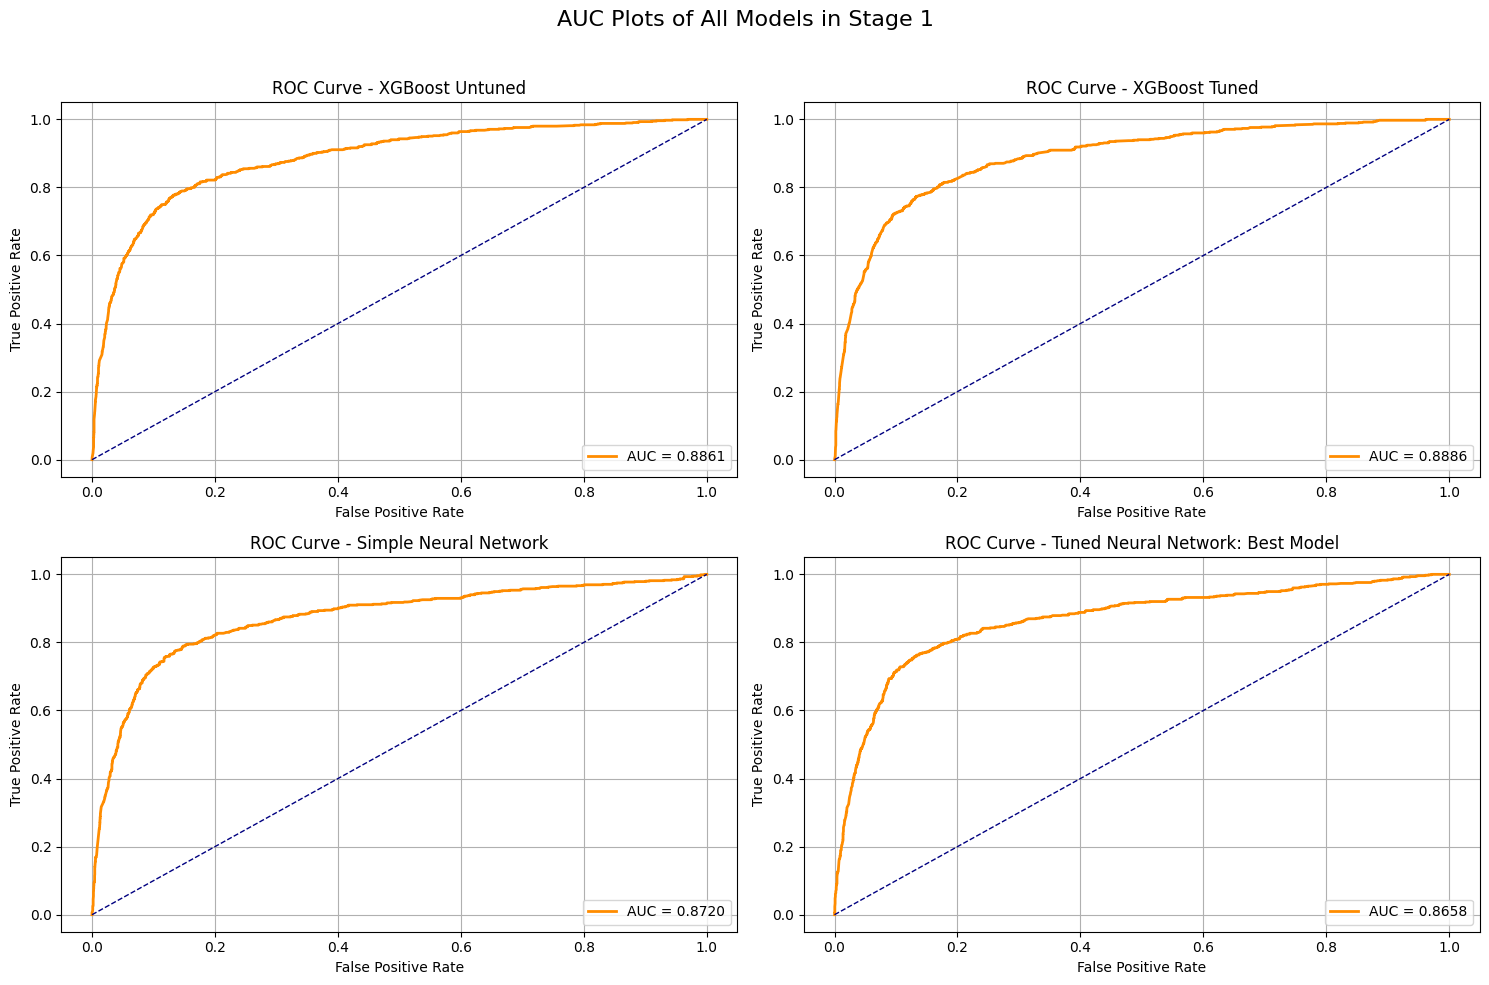

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate probability predictions for each model

# XGBoost models
predictions_xgb_untuned_1 = xg_model_1.predict_proba(X_test)[:, 1]
predictions_xgb_tuned_1 = best_xg_model.predict_proba(X_test)[:, 1]

# Neural Network models
y_pred_untuned_neural_data1 = model_NN_1.predict(X_test_scaled).flatten() # Use scaled data for NN prediction
y_pred_tuned_NN1 = best_model.predict(X_test_scaled).flatten() # Use scaled data for NN prediction

# Dictionary of model predictions
models = {
    'XGBoost Untuned': (y_test, predictions_xgb_untuned_1),
    'XGBoost Tuned': (y_test, predictions_xgb_tuned_1),
    'Simple Neural Network': (y_test, y_pred_untuned_neural_data1),
    'Tuned Neural Network: Best Model': (y_test, y_pred_tuned_NN1)
}

# Plotting
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('AUC Plots of All Models in Stage 1', fontsize=16)
ax = ax.flatten()

for idx, (model_name, (y_true, y_proba)) in enumerate(models.items()):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)

    ax[idx].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.4f}')
    ax[idx].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    ax[idx].set_title(f'ROC Curve - {model_name}')
    ax[idx].set_xlabel('False Positive Rate')
    ax[idx].set_ylabel('True Positive Rate')
    ax[idx].legend(loc='lower right')
    ax[idx].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Based on the ROC curves, the tuned XGBoost model delivers the best performance with an AUC of 0.8886, showing strong ability to distinguish between classes. The untuned XGBoost model follows closely with an AUC of 0.8861, already demonstrating high classification quality without optimization. The simple neural network achieves a slightly lower AUC of 0.8720, indicating decent performance but with room for improvement. The tuned neural network, while enhanced over its untuned counterpart, has the lowest AUC at 0.8658.

### Load the data set

As new data becomes available, we will apply the same preprocessing steps used in stage 1 to ensure consistency and compatibility.

## Stage 2

## Stage 2 data preprocessing

In [2]:
# loadthe data
data2=pd.read_csv("https://drive.google.com/uc?id=1vy1JFQZva3lhMJQV69C43AB1NTM4W-DZ")

print(data2.shape)
data2.head()

(25059, 18)


,CentreName,LearnerCode,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionDegree,ProgressionUniversity,AuthorisedAbsenceCount,UnauthorisedAbsenceCount
0,ISC_Aberdeen,2284932,Agent,Standard Agent Booking,NaN,13/01/1998,Male,Chinese,Jianye District; Jiangsu Province,Nanjing,Pre-Masters,Business and Law Pre-Masters,True,Yes,Msc Econ Accounting and Investment Management,University of Aberdeen,NaN,NaN
1,ISC_Aberdeen,2399500,Agent,Standard Agent Booking,NaN,12/2/1998,Male,Chinese,NaN,Xi'an,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,BSc Biological Sciences,University of Aberdeen,93.0,5.0
2,ISC_Aberdeen,2424946,Agent,Standard Agent Booking,NaN,7/4/2000,Male,Chinese,NaN,Chengdu,International Year Two,Business Management and Finance International ...,False,Yes,MA Finance,University of Aberdeen,92.0,6.0
3,ISC_Aberdeen,2426583,Agent,Standard Agent Booking,NaN,18/05/1999,Male,Chinese,NaN,LIUYANG CITY ;CHANGSHA,International Year Two,Business Management and Finance International ...,True,Yes,MA Business Management,University of Aberdeen,67.0,15.0
4,ISC_Aberdeen,2434674,Agent,Standard Agent Booking,NaN,19/04/1996,Male,Chinese,NaN,Xiamen,Pre-Masters,Business and Law Pre-Masters,True,Yes,MSc International Business Management,University of Aberdeen,NaN,NaN


In [3]:
# Determine metadata of DataFrame
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CentreName                25059 non-null  object 
 1   LearnerCode               25059 non-null  int64  
 2   BookingType               25059 non-null  object 
 3   LeadSource                25059 non-null  object 
 4   DiscountType              7595 non-null   object 
 5   DateofBirth               25059 non-null  object 
 6   Gender                    25059 non-null  object 
 7   Nationality               25059 non-null  object 
 8   HomeState                 8925 non-null   object 
 9   HomeCity                  21611 non-null  object 
 10  CourseLevel               25059 non-null  object 
 11  CourseName                25059 non-null  object 
 12  IsFirstIntake             25059 non-null  bool   
 13  CompletedCourse           25059 non-null  object 
 14  Progre

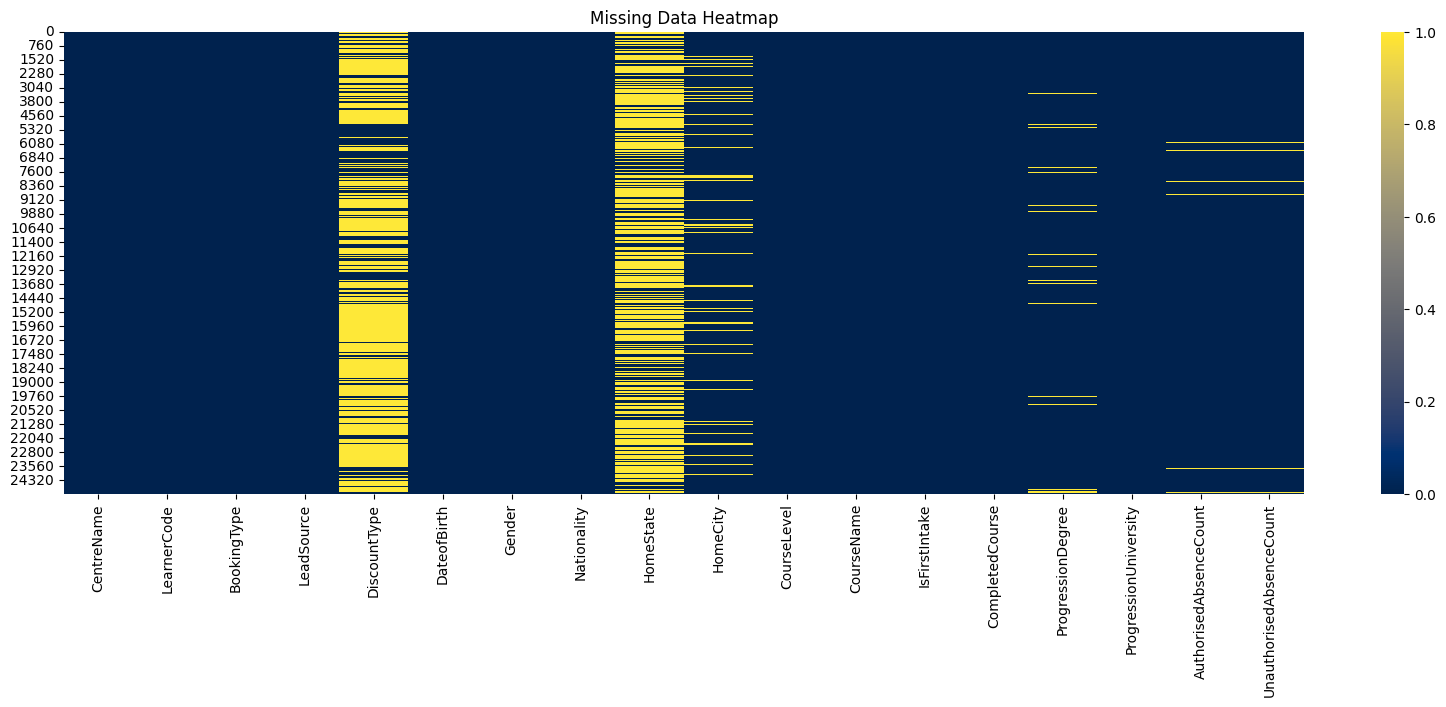

In [4]:
# Check for missing cells
data2.isnull().sum()

# Visualize missing data2
plt.figure(figsize=(20,6))
sns.heatmap(data2.isnull(), cbar=True, cmap="cividis")
plt.title('Missing Data Heatmap')
plt.show()

### Remove any columns that are not useful

In [5]:
# remove columns that are not useful (Learnerscode)
data2=data2.drop(columns=['LearnerCode'])
print(data2.shape)
data2.head()

(25059, 17)


,CentreName,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionDegree,ProgressionUniversity,AuthorisedAbsenceCount,UnauthorisedAbsenceCount
0,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,13/01/1998,Male,Chinese,Jianye District; Jiangsu Province,Nanjing,Pre-Masters,Business and Law Pre-Masters,True,Yes,Msc Econ Accounting and Investment Management,University of Aberdeen,NaN,NaN
1,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,12/2/1998,Male,Chinese,NaN,Xi'an,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,BSc Biological Sciences,University of Aberdeen,93.0,5.0
2,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,7/4/2000,Male,Chinese,NaN,Chengdu,International Year Two,Business Management and Finance International ...,False,Yes,MA Finance,University of Aberdeen,92.0,6.0
3,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,18/05/1999,Male,Chinese,NaN,LIUYANG CITY ;CHANGSHA,International Year Two,Business Management and Finance International ...,True,Yes,MA Business Management,University of Aberdeen,67.0,15.0
4,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,19/04/1996,Male,Chinese,NaN,Xiamen,Pre-Masters,Business and Law Pre-Masters,True,Yes,MSc International Business Management,University of Aberdeen,NaN,NaN


### Remove columns with high cardinality (any column with more that 200 unique values)

Before removing columns with high cardinality we will create an 'Age' column from the 'DateofBirth' column

In [6]:
# Create an 'Age' column
data2['DateofBirth'] = pd.to_datetime(data2['DateofBirth'])
data2['Age'] = datetime.today().year - data2['DateofBirth'].dt.year
print(data2.shape)
data2.head()

(25059, 18)


,CentreName,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionDegree,ProgressionUniversity,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,Age
0,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,1998-01-13,Male,Chinese,Jianye District; Jiangsu Province,Nanjing,Pre-Masters,Business and Law Pre-Masters,True,Yes,Msc Econ Accounting and Investment Management,University of Aberdeen,NaN,NaN,27
1,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,1998-02-12,Male,Chinese,NaN,Xi'an,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,BSc Biological Sciences,University of Aberdeen,93.0,5.0,27
2,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,2000-04-07,Male,Chinese,NaN,Chengdu,International Year Two,Business Management and Finance International ...,False,Yes,MA Finance,University of Aberdeen,92.0,6.0,25
3,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,1999-05-18,Male,Chinese,NaN,LIUYANG CITY ;CHANGSHA,International Year Two,Business Management and Finance International ...,True,Yes,MA Business Management,University of Aberdeen,67.0,15.0,26
4,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,1996-04-19,Male,Chinese,NaN,Xiamen,Pre-Masters,Business and Law Pre-Masters,True,Yes,MSc International Business Management,University of Aberdeen,NaN,NaN,29


In [7]:
# Drop columns with high cardinality (with unique values greater than 200) for nonnumerical columns
high_cardinality_cols = data2.select_dtypes(exclude='number').nunique()[data2.select_dtypes(exclude='number').nunique() > 200].index

# Identify columns with high cardinality
#high_cardinality_cols = data2.nunique()[data2.nunique() > 200].index

# Drop the identified columns
data2.drop(high_cardinality_cols, axis=1, inplace=True)

print(data2.shape)
data2.head()

(25059, 14)


,CentreName,BookingType,LeadSource,DiscountType,Gender,Nationality,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionUniversity,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,Age
0,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,Yes,University of Aberdeen,NaN,NaN,27
1,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,Male,Chinese,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,University of Aberdeen,93.0,5.0,27
2,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,Male,Chinese,International Year Two,Business Management and Finance International ...,False,Yes,University of Aberdeen,92.0,6.0,25
3,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,Male,Chinese,International Year Two,Business Management and Finance International ...,True,Yes,University of Aberdeen,67.0,15.0,26
4,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,Yes,University of Aberdeen,NaN,NaN,29


### Remove columns with >50% data missing.

In [8]:
# Drop columns with more than 50% data missing
missing_percentage = data2.isnull().mean() * 100
columns_to_drop = missing_percentage[missing_percentage > 50].index
data2.drop(columns_to_drop, axis=1, inplace=True)

print(data2.shape)
data2.head()

(25059, 13)


,CentreName,BookingType,LeadSource,Gender,Nationality,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionUniversity,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,Age
0,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,Yes,University of Aberdeen,NaN,NaN,27
1,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,University of Aberdeen,93.0,5.0,27
2,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,International Year Two,Business Management and Finance International ...,False,Yes,University of Aberdeen,92.0,6.0,25
3,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,International Year Two,Business Management and Finance International ...,True,Yes,University of Aberdeen,67.0,15.0,26
4,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,Yes,University of Aberdeen,NaN,NaN,29


### Perform ordinal encoding for ordinal data.

In [9]:
# Perform ordinal encoding on Ordinal column ('CourseLevel')

# Define the order of categories from lowest to highest
categories = [['Foundation', 'International Year One', 'International Year Two', 'Pre-Masters']]

encoder = OrdinalEncoder(categories=categories)
data2['CourseLevel_encoded'] = encoder.fit_transform(data2[['CourseLevel']])

drop_columns = ['CourseLevel']
data2.drop(drop_columns, axis=1, inplace=True)

print(data2.shape)
data2.head()

(25059, 13)


,CentreName,BookingType,LeadSource,Gender,Nationality,CourseName,IsFirstIntake,CompletedCourse,ProgressionUniversity,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,Age,CourseLevel_encoded
0,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Business and Law Pre-Masters,True,Yes,University of Aberdeen,NaN,NaN,27,3.0
1,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Life Sciences Undergraduate Foundation Programme,False,Yes,University of Aberdeen,93.0,5.0,27,0.0
2,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Business Management and Finance International ...,False,Yes,University of Aberdeen,92.0,6.0,25,2.0
3,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Business Management and Finance International ...,True,Yes,University of Aberdeen,67.0,15.0,26,2.0
4,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Business and Law Pre-Masters,True,Yes,University of Aberdeen,NaN,NaN,29,3.0


### Perform One-hot encoding for all other categorical dataset.

In [10]:
# Identify categorical data in the data set
categorical_columns = data2.select_dtypes(include=['object']).columns

# Perform one-hot encoding on categorical columns
data2 = pd.get_dummies(data2, columns=categorical_columns, drop_first=True)

print(data2.shape)
data2.head()

(25059, 392)


,IsFirstIntake,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,Age,CourseLevel_encoded,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,CentreName_ISC_Durham,CentreName_ISC_Holland,CentreName_ISC_Huddersfield,...,ProgressionUniversity_University College Dublin,ProgressionUniversity_University of Aberdeen,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam
0,True,NaN,NaN,27,3.0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,93.0,5.0,27,0.0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,92.0,6.0,25,2.0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,True,67.0,15.0,26,2.0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,True,NaN,NaN,29,3.0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


### Handle missing values

After replicating the stage one preprocessing steps on the stage two dataset, some rows contained missing values due to the addition of two new columns. To address this, rows with missing values were dropped if they made up less than 2% of the dataset, while they will be replaced with some form of value if they made up more than 2% of rows in the dataset.


In [11]:
# Check number and percentage of rows with missing value.
missing_rows = data2[data2.isnull().any(axis=1)]
missing_rows_percentage = (missing_rows.shape[0] / data2.shape[0]) * 100



print(f"Number of rows with missing values: {missing_rows.shape[0]}")
print(f"Percentage of rows with missing values: {missing_rows_percentage:.2f}%")

Number of rows with missing values: 208
Percentage of rows with missing values: 0.83%


Since percentage of rows with missing values is less than 2% we will drop them.

In [12]:
# Drop rows with missing values
if missing_rows_percentage < 2:
    data2 = data2.dropna()
    print("Dropped rows with missing values.")


Dropped rows with missing values.


In [13]:

print(data2.shape)
data2.head()

(24851, 392)


,IsFirstIntake,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,Age,CourseLevel_encoded,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,CentreName_ISC_Durham,CentreName_ISC_Holland,CentreName_ISC_Huddersfield,...,ProgressionUniversity_University College Dublin,ProgressionUniversity_University of Aberdeen,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam
1,False,93.0,5.0,27,0.0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,92.0,6.0,25,2.0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,True,67.0,15.0,26,2.0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,True,67.0,3.0,25,2.0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,False,29.0,18.0,23,0.0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


After preprocessing in stage 2, the dataset was reduced to 24,851 rows from the original 25,059 due to the removal of rows with missing values.

### Convert target variable from string to binary encoding

As done for stage1 the 'CompleteCourse' column is the target variable. It shows whether a student completed the course or not, acting as an indicator of dropout

To improve clarity, we'll create a new target column called 'dropout' by inverting the existing 'CourseCompletion' column. This way, students who dropped out are marked with 1, and those who did not drop out (completed the course) are marked with 0, making it easier to interpret

In [14]:
# Create 'dropout' column: 1 if student dropped out, 0 if they completed the course
data2['dropout'] = 1 - data2['CompletedCourse_Yes']

# Display both columns
data2[['dropout', 'CompletedCourse_Yes']]

,dropout,CompletedCourse_Yes
1,0,True
2,0,True
3,0,True
5,0,True
6,1,False
...,...,...
25054,0,True
25055,0,True
25056,0,True
25057,1,False


In [15]:
# Drop the 'CourseLevel' Column
data2.drop('CompletedCourse_Yes', axis=1, inplace=True)

print(data2.shape)
data2.head()

(24851, 392)


,IsFirstIntake,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,Age,CourseLevel_encoded,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,CentreName_ISC_Durham,CentreName_ISC_Holland,CentreName_ISC_Huddersfield,...,ProgressionUniversity_University of Aberdeen,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam,dropout
1,False,93.0,5.0,27,0.0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,0
2,False,92.0,6.0,25,2.0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,0
3,True,67.0,15.0,26,2.0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,0
5,True,67.0,3.0,25,2.0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,0
6,False,29.0,18.0,23,0.0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,1


### Checking for inbalace in the target variable

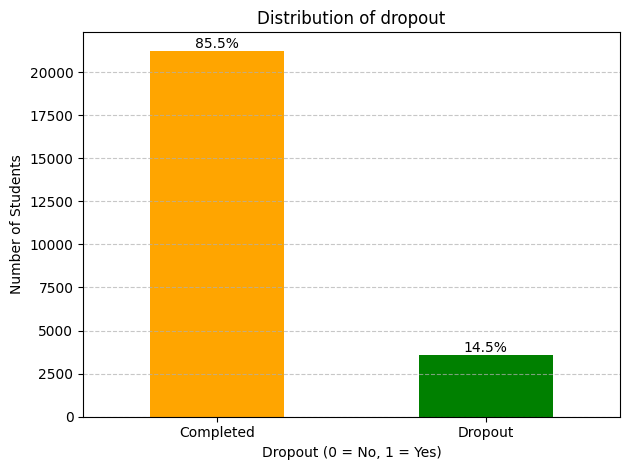

In [16]:
# Calculate class counts and percentages
counts = data2['dropout'].value_counts().sort_index()
percentages = counts / counts.sum() * 100

# Plot the bar chart
ax = counts.plot(kind='bar', color=['orange', 'green'])

# Add title and labels
plt.title('Distribution of dropout')
plt.xlabel('Dropout (0 = No, 1 = Yes)')
plt.ylabel('Number of Students')
plt.xticks([0, 1], ['Completed', 'Dropout'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on top of bars
for i, (count, pct) in enumerate(zip(counts, percentages)):
    plt.text(i, count + 1, f'{pct:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

The chart shows a 0.5% increase in the proportion of the Completed class, with a corresponding 0.5% decrease in the Dropout class.

### Split dataset into training and test set for training

In [17]:
# Seperate the dataset into data for processing (X) and target out come (Y)
X = data2.drop(['dropout'], axis=1)
y = data2['dropout']

print(X.shape)
print(y.shape)
# Seperate the dataset into data for processing (X) and target out come (Y)
X = data2.drop(['dropout'], axis=1)
y = data2['dropout']

print(X.shape)
print(y.shape)

# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24851, 391)
(24851,)
(24851, 391)
(24851,)
(19880, 391)
(4971, 391)
(19880,)
(4971,)


## **XGBoost**

As done in stage 1, we will be employing the XGBoost model for machine learning as it is very good in classification tasks

### Simple XGBoost model without tuning the models parameters Stage 2

XGBoost Classifier Performance
Accuracy: 0.9094749547374774
Precision: 0.7352941176470589
Recall: 0.5886426592797784
F1 Score: 0.6538461538461539
AUC-ROC: 0.7763170933489972
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      4249
           1       0.74      0.59      0.65       722

    accuracy                           0.91      4971
   macro avg       0.83      0.78      0.80      4971
weighted avg       0.90      0.91      0.91      4971



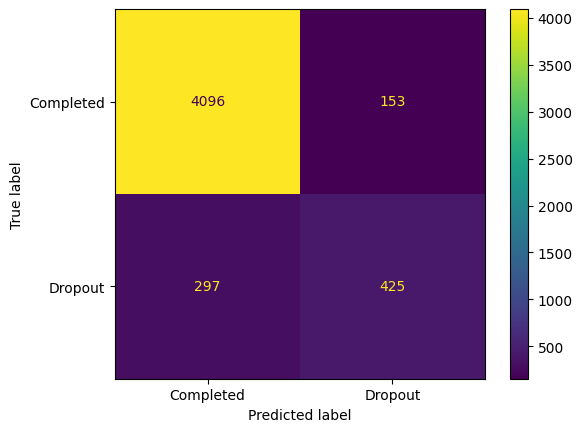

In [18]:
# Define the model
xg_model_2 = xgb.XGBClassifier(random_state=42)
xg_model_2.fit(X_train, y_train)

# Model evaluation
predictions2 = xg_model_2.predict(X_test)
# Print evaluation metrics
print('XGBoost Classifier Performance')
print('Accuracy:', accuracy_score(y_test, predictions2))
print('Precision:', precision_score(y_test, predictions2))
print('Recall:', recall_score(y_test, predictions2))
print('F1 Score:', f1_score(y_test, predictions2))
print('AUC-ROC:', roc_auc_score(y_test, predictions2))

#print("XGBoost Model Accuracy: ", accuracy_score(y_test, predictions2))
print(classification_report(y_test, predictions2))


cm_1 = confusion_matrix(y_test, predictions2)
cfmd = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=["Completed","Dropout"])
cfmd.plot()
plt.show()

Despite the additional feature, a significant class imbalance remains. The simple XGBoost model continued to struggle with predicting student dropout. It achieved 91% accuracy with strong precision and recall for the Completed class. However, recall for the Dropout class—our main focus—only rose slightly from 56% to 59% (from stage one untuned XGboost model), meaning the model correctly identified just 58% of students who dropped out.

The untuned XGBoost classifier on the stage 2 dataset demonstrates moderate performance, with an AUC-ROC of 77%. Given the dataset’s imbalance, the accuracy of 91% may be misleading, as the model still heavily favors the majority class. Completed class performs well with precision (93%), recall (97%), and F1-score (95%), while Dropout Class struggles with precision (74%), recall (59%), and F1-score (65%), suggesting difficulty in detecting minority instances.


### Tuned XGBoost Model Stage 2

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
XGBoost Classifier Performance
Accuracy: 0.8736672701669684
Precision: 0.5440900562851783
Recall: 0.8033240997229917
F1 Score: 0.6487695749440716
AUC-ROC: 0.844472122819839
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      4249
           1       0.54      0.80      0.65       722

    accuracy                           0.87      4971
   macro avg       0.75      0.84      0.79      4971
weighted avg       0.90      0.87      0.88      4971



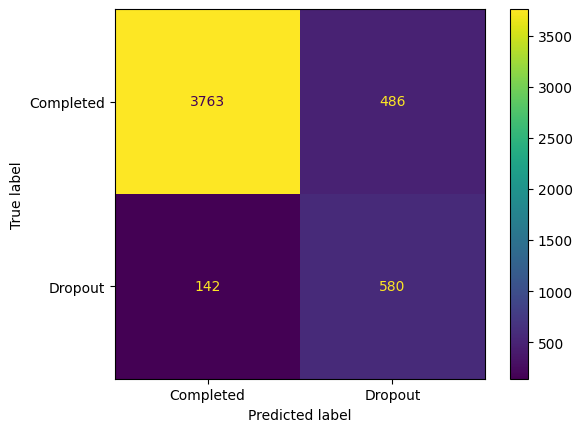

In [19]:
# Set weight as the for the model as
class_weights = {0: 1, 1: len(y_train[y_train==0]) / len(y_train[y_train==1])}

# Define the model
# Use the calculated weight for the positive class (dropout, which is class 1)
xg_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=class_weights[1])

# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.1, 0.2, 0.5],
    'max_depth': [5, 7, 10],
    'n_estimators': [200, 300, 500]
}

# Perform grid search
# Changed scoring to 'f1' as it's often more relevant for imbalanced datasets than just 'recall'
grid_search = GridSearchCV(xg_model, param_grid, scoring='recall', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test data
best_xg_model = grid_search.best_estimator_
predictions_tuned_xgb2 = best_xg_model.predict(X_test)

print('XGBoost Classifier Performance')
print('Accuracy:', accuracy_score(y_test, predictions_tuned_xgb2))
print('Precision:', precision_score(y_test, predictions_tuned_xgb2))
print('Recall:', recall_score(y_test, predictions_tuned_xgb2))
print('F1 Score:', f1_score(y_test, predictions_tuned_xgb2))
print('AUC-ROC:', roc_auc_score(y_test, predictions_tuned_xgb2))

print(classification_report(y_test, predictions_tuned_xgb2))

# Confusion matrix
cm = confusion_matrix(y_test, predictions_tuned_xgb2)
cfmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Completed","Dropout"])
cfmd.plot()
plt.show()

The tuned XGBoost model achieved an AUC-ROC of 0.844, showing a strong ability to distinguish between dropout and non-dropout students, which is critical given the class imbalance. With a recall of 80% for the dropout class, it captures most at-risk students. Precision for the Dropout class is 54%, suggesting some false positives, but the F1 score of 0.65 reflects a reasonable balance. Overall accuracy stands at 87%, with very strong performance on the majority class (precision: 96%, recall: 89%).

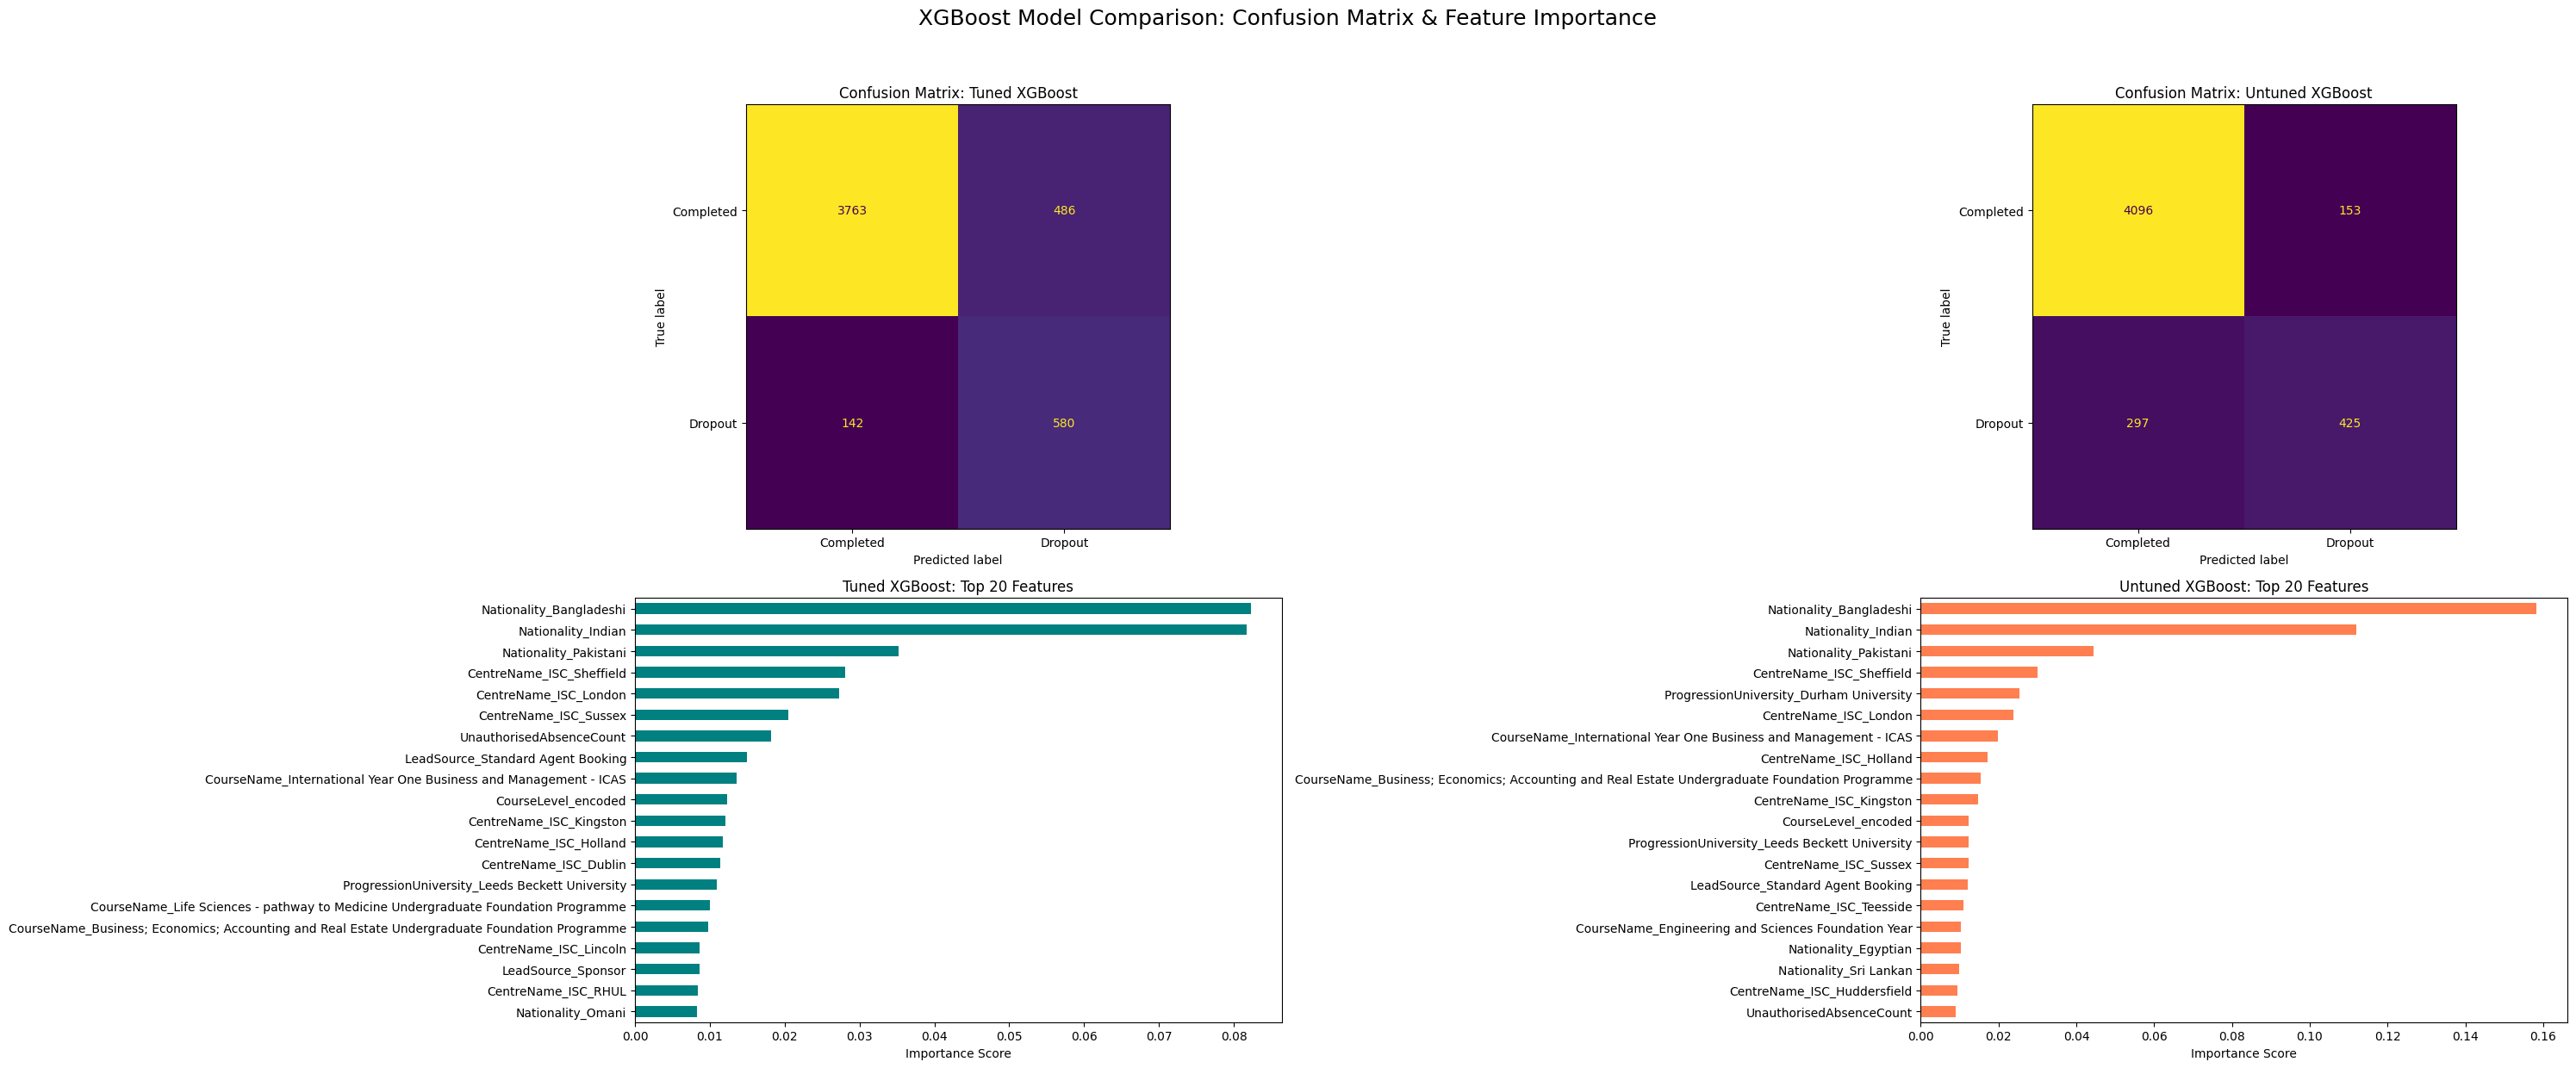

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(30, 12))
fig.suptitle("XGBoost Model Comparison: Confusion Matrix & Feature Importance", fontsize=18, y=1.03)

# --- 1. Confusion matrix for tuned XGBoost model (Top-Left) ---
cm_tuned = confusion_matrix(y_test, best_xg_model.predict(X_test))
cfmd_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=["Completed", "Dropout"])
cfmd_tuned.plot(ax=axs[0, 0], colorbar=False)
axs[0, 0].set_title("Confusion Matrix: Tuned XGBoost")

# --- 2. Confusion matrix for untuned XGBoost model (Top-Right) ---
cm_untuned = confusion_matrix(y_test, xg_model_2.predict(X_test))
cfmd_untuned = ConfusionMatrixDisplay(confusion_matrix=cm_untuned, display_labels=["Completed", "Dropout"])
cfmd_untuned.plot(ax=axs[0, 1], colorbar=False)
axs[0, 1].set_title("Confusion Matrix: Untuned XGBoost")


# --- 3. Feature importance for tuned XGBoost model (Bottom-Left) ---
tuned_importance = pd.Series(best_xg_model.feature_importances_, index=X_train.columns).sort_values()
tuned_importance.tail(20).plot.barh(ax=axs[1, 0], color='teal')
axs[1, 0].set_title("Tuned XGBoost: Top 20 Features")
axs[1, 0].set_xlabel("Importance Score")

# --- 4. Feature importance for untuned XGBoost model (Bottom-Right) ---
untuned_importance = pd.Series(xg_model_2.feature_importances_, index=X_train.columns).sort_values()
untuned_importance.tail(20).plot.barh(ax=axs[1, 1], color='coral')
axs[1, 1].set_title("Untuned XGBoost: Top 20 Features")
axs[1, 1].set_xlabel("Importance Score")

plt.tight_layout()
plt.show()


The tuned XGBoost model shows a clear improvement in identifying dropout students, reducing false negatives from 297 to 142 compared to the untuned version. This boosts recall for the dropout class, making it more effective at flagging at-risk students. However, this comes with a tradeoff—slightly more false positives for the completed class (486 vs. 153), reflecting a shift in focus toward better sensitivity at the cost of precision.

The tuned model places strong emphasis on features like Nationality and Centre Name, with some influence from course-related attributes. Notably, it ranks the new feature *Unauthorized Absence Count* as the 7th most important factor, highlighting its relevance in predicting dropouts. In contrast, the untuned model leans more heavily on demographic features such as Nationality and Progression University, includes some course attributes, but ranks *Unauthorized Absence Count* much lower—only 20th—suggesting it underestimates its impact.



## **Neural Network**

### Stage 2 Simple Neural Network

In [21]:
# Split the test set
#X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [22]:
# Scale the data set for training the neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Epoch 1/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 29s 58ms/step - accuracy: 0.8342 - loss: 0.5599 - val_accuracy: 0.8911 - val_loss: 0.3743
Epoch 2/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 29s 58ms/step - accuracy: 0.8972 - loss: 0.3498 - val_accuracy: 0.8956 - val_loss: 0.3330
Epoch 3/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 29s 58ms/step - accuracy: 0.9021 - loss: 0.3069 - val_accuracy: 0.8901 - val_loss: 0.3230
Epoch 4/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 29s 58ms/step - accuracy: 0.9038 - loss: 0.2850 - val_accuracy: 0.8941 - val_loss: 0.3123
Epoch 5/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.9074 - loss: 0.2579 - val_accuracy: 0.8944 - val_loss: 0.3104
Epoch 6/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.9010 - loss: 0.2564 - val_accuracy: 0.8971 - val_loss: 0.2997
Epoch 7/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.9062 - loss: 0.2376 - val_accuracy: 0.8974 - val_loss: 0.2995
Epoch 8/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 28s 57ms/step - accuracy: 0.9125 - loss: 0.2304 - 

<Figure size 1200x500 with 0 Axes>

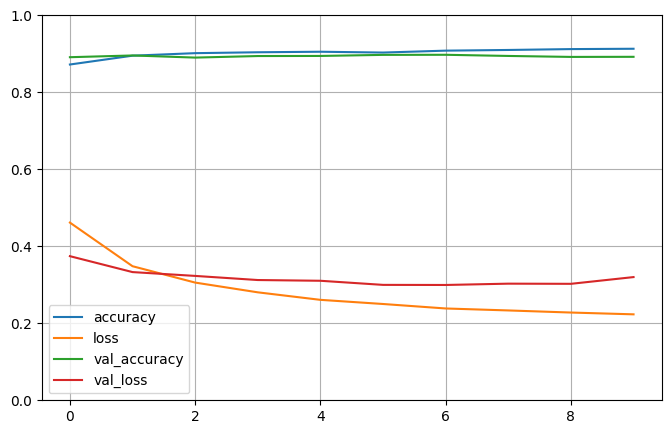

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Classification Report Untuned Neural Net Model:
Accuracy: 0.895996781331724
Precision: 0.6683087027914614
Recall: 0.5637119113573407
F1 Score: 0.6115702479338843
AUC-ROC: 0.758085656784813
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4249
           1       0.67      0.56      0.61       722

    accuracy                           0.90      4971
   macro avg       0.80      0.76      0.78      4971
weighted avg       0.89      0.90      0.89      4971



<Figure size 600x600 with 0 Axes>

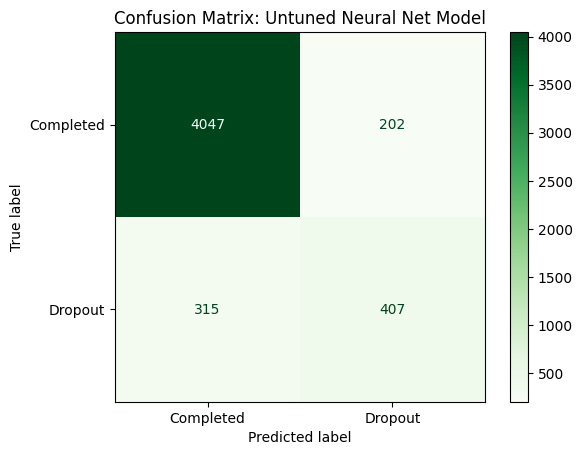

In [23]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import keras # Import keras
# Define a function to create and compile a neural network model, with regulizers and dropout.
def create_model():
    model = Sequential()

    model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

    model.add(Dense(128, activation='relu',  kernel_regularizer=l2(0.001)))  # First hidden layer
    model.add(Dropout(0.5))  # Dropout layer

    model.add(Dense(64, activation='relu',  kernel_regularizer=l2(0.001)))  # Second hidden layer
    model.add(Dropout(0.5))  # Dropout layer

    model.add(Dense(1, activation='sigmoid'))  # Output layer

    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define function to train the model and return history.
model_NN_2 = create_model()
history = model_NN_2.fit(X_train_scaled, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stopping])

# Plot training history
plt.figure(figsize=(12, 5))

# Plot the key metrics in a pandas dataframe.
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Set the vertical range to [0-1].
plt.show()

# Evaluate on test set
y_pred_prob = model_NN_2.predict(X_test_scaled)
y_pred_untuned_neural_data2 = (y_pred_prob > 0.5).astype(int)

# Print classification report
print("\nClassification Report Untuned Neural Net Model:")
print('Accuracy:', accuracy_score(y_test, y_pred_untuned_neural_data2))
print('Precision:', precision_score(y_test, y_pred_untuned_neural_data2))
print('Recall:', recall_score(y_test, y_pred_untuned_neural_data2))
print('F1 Score:', f1_score(y_test, y_pred_untuned_neural_data2))
print('AUC-ROC:', roc_auc_score(y_test, y_pred_untuned_neural_data2))
print(classification_report(y_test, y_pred_untuned_neural_data2))


# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_untuned_neural_data2)

# Define class labels (0 = Completed, 1 = Dropout)
labels = ["Completed", "Dropout"]

# Plot using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
plt.figure(figsize=(6, 6))
disp.plot(cmap='Greens')
plt.title("Confusion Matrix: Untuned Neural Net Model")
plt.show()

### **Comparing Stage 1 and Stage 2 Untuned model performance**
Between Stage 1 and Stage 2 datasets, both XGBoost and the neural network models improved, but XGBoost showed consistently stronger gains. XGBoost’s accuracy rose from 89.3% to 90.9% (+1.66%), while the neural network improved only slightly from 89.0% to 89.6% (+0.63%). For the dropout class—your main focus—XGBoost made a significant leap in precision (from 66.9% to 73.5%) and recall (from 55.8% to 58.9%), resulting in a 4.5% gain in F1-score. In contrast, the neural network's gains were minimal: precision rose just 1.25%, recall improved by 0.68%, and F1-score increased by less than 1%.

The AUC-ROC trend reinforces this gap. XGBoost improved from 75.5% to 77.6% (+2.14%), while the neural network edged up from 76.4% to 77.0% (+0.56%). These patterns suggest XGBoost generalizes better and captures structure in the tabular Stage 2 data more effectively. Its tree-based design and built-in regularization allow it to adapt to subtle shifts in feature importance, especially where relationships are non-linear or segmented. Meanwhile, the neural network may have hit its limit without deeper tuning or additional regularization. Overall, XGBoost not only scaled better between stages but also delivered sharper improvements in the metrics that matter most for dropout detection.

### **Reason for Difference in results**

The performance gap between XGBoost and the neural network stems from how each model processes structured data. XGBoost uses decision trees with gradient boosting, making it well-suited for tabular datasets, where feature importance is clear and categorical variables play a major role. It prioritizes strong predictors and dynamically adjusts for class imbalance, which likely helped it better identify dropout cases in the Stage 2 dataset. In contrast, neural networks rely on layered transformations that work best with complex, high-dimensional data. Without extensive tuning and regularization due to time and computing power limitations, it struggled with the structured inputs and imbalance in the target classes. XGBoost’s built-in regularization, faster convergence, and ability to handle dominant features made it more effective on Stage 2, while the neural network may have underperformed due to insufficient tuning or overfitting. These differences explain why XGBoost captured patterns more accurately and improved more significantly across stages.


### Tuned Neural Network

Epoch 1/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.7308 - loss: 0.7096 - val_accuracy: 0.8415 - val_loss: 0.5421
Epoch 2/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.8412 - loss: 0.5466 - val_accuracy: 0.8456 - val_loss: 0.4700
Epoch 3/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.8549 - loss: 0.4768 - val_accuracy: 0.8345 - val_loss: 0.4721
Epoch 4/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.8515 - loss: 0.4448 - val_accuracy: 0.8438 - val_loss: 0.4443
Epoch 5/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.8590 - loss: 0.4338 - val_accuracy: 0.8463 - val_loss: 0.4187
Epoch 6/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.8608 - loss: 0.4102 - val_accuracy: 0.8486 - val_loss: 0.4102
Epoch 7/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.8668 - loss: 0.4041 - val_accuracy: 0.8529 - val_loss: 0.3913
Epoch 8/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.8653 - loss: 0.3986 - 

<Figure size 1200x500 with 0 Axes>

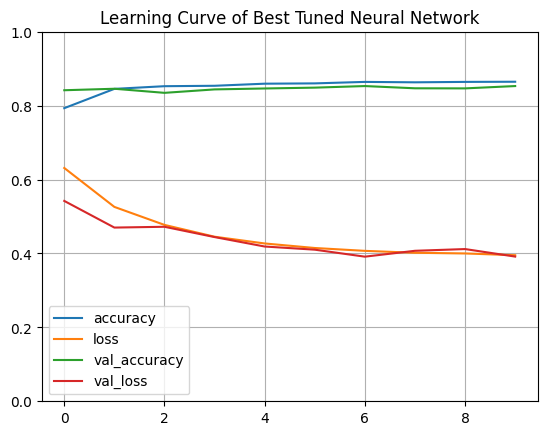

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Classification Report Tuned Neural Net Model:
Accuracy: 0.8666264333132166
Precision: 0.5290068829891839
Recall: 0.7451523545706371
F1 Score: 0.6187464059804485
AUC-ROC: 0.8162099734726568
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      4249
           1       0.53      0.75      0.62       722

    accuracy                           0.87      4971
   macro avg       0.74      0.82      0.77      4971
weighted avg       0.89      0.87      0.88      4971



<Figure size 600x600 with 0 Axes>

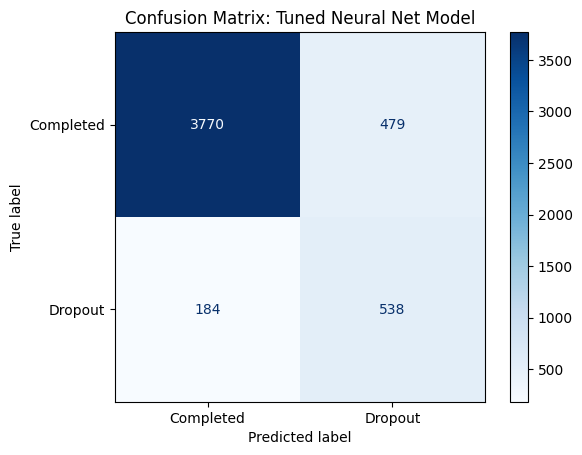

In [24]:
# Compute Class Weights for Imbalanced Data
class_weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Define Hyperparameter Options
number_of_neurons = [16, 32, 64]
activations = ['relu', 'tanh', 'sigmoid']
optimizer_names = ['adam', 'sgd', 'RMSprop'] # Store optimizer names, not instances

# Create Neural Network Model with Variable Hyperparameters
def create_model(neurons=64, activation='relu', optimizer_name='adam', learning_rate=0.001):
    model = Sequential()

    # Ensure input_dim matches the number of features in your scaled training data
    model.add(Dense(neurons, input_dim=X_train_scaled.shape[1], activation=activation))

    model.add(Dense(neurons * 2, activation=activation, kernel_regularizer=l2(0.001)))  # First hidden layer
    model.add(Dropout(0.5))

    model.add(Dense(neurons, activation=activation, kernel_regularizer=l2(0.001)))  # Second hidden layer
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))  # Output layer

    if optimizer_name == 'adam':
        optimizer_instance = Adam(learning_rate=learning_rate)
    elif optimizer_name == 'sgd':
        optimizer_instance = SGD(learning_rate=learning_rate)
    elif optimizer_name == 'RMSprop':
        optimizer_instance = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError(f"Unknown optimizer name: {optimizer_name}")

    model.compile(loss='binary_crossentropy', optimizer=optimizer_instance, metrics=['accuracy'])
    return model

# Define Learning Rates for Hyperparameter Search
learning_rates = [0.001, 0.01, 0.1]

# Perform Random Hyperparameter Search and Train Models
histories_tuned = []
for _ in range(10):
    neurons = random.choice(number_of_neurons)
    activation = random.choice(activations)
    optimizer_name = random.choice(optimizer_names)
    lr = random.choice(learning_rates) # Randomly choose a learning rate

    # Pass the selected hyperparameters to create_model
    model = create_model(neurons=neurons, activation=activation, optimizer_name=optimizer_name)
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


    # Use validation_split as defined in the original code
    history = model.fit(X_train_scaled, y_train,
                        epochs=20, batch_size=32, # Using a fixed batch size for now
                        validation_split=0.2,
                        verbose=1,
                        callbacks=[early_stopping],
                        class_weight=class_weight_dict)

    histories_tuned.append({
        'history': history.history,
        'params': {
            'neurons': neurons,
            'activation': activation,
            'optimizer': optimizer_name, # Store the name, not the instance
            'learning_rate': lr, # Store the learning rate
            'epochs': history.params['epochs']
        }
    })

# Identify Best Hyperparameters Based on Validation Accuracy
best_result = max(histories_tuned, key=lambda x: x['history'].get('val_accuracy', [-1])[-1])

# Display best parameters
print("\nBest Hyperparameters Found:")
for k, v in best_result['params'].items():
    print(f"{k}: {v}")

# Plot learning curves of best model
plt.figure(figsize=(12, 5))
pd.DataFrame(best_result['history']).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('Learning Curve of Best Tuned Neural Network')
plt.show()

# Evaluate best model on test set
# Recreate the best model using the best parameters found
best_model = create_model(
    neurons=best_result['params']['neurons'],
    activation=best_result['params']['activation'],
    optimizer_name=best_result['params']['optimizer'],
    learning_rate=best_result['params']['learning_rate']
)

# Rebuild and Train Best Model on Full Training Data
best_model.fit(X_train_scaled, y_train,
               epochs=best_result['params']['epochs'],
               batch_size=32, # Using a fixed batch size for the final fit
               validation_split=0.2, # Use separate validation data
               callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)],
               verbose=0,
               class_weight=class_weight_dict) # Ensure class weights are used here too

# Evaluate Best Model on Test Set and Display Classification Report
y_pred_prob = best_model.predict(X_test_scaled)
y_pred_tuned = (y_pred_prob > 0.5).astype(int)

print("\nClassification Report Tuned Neural Net Model:")
print('Accuracy:', accuracy_score(y_test,  y_pred_tuned))
print('Precision:', precision_score(y_test,  y_pred_tuned))
print('Recall:', recall_score(y_test,  y_pred_tuned))
print('F1 Score:', f1_score(y_test,  y_pred_tuned))
print('AUC-ROC:', roc_auc_score(y_test,  y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))


# Plot confusion matrix
y_pred_class = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary labels
cm = confusion_matrix(y_test, y_pred_class)

# Define class labels (0 = Completed, 1 = Dropout)
labels = ["Completed", "Dropout"]

# Plot Confusion Matrix for Test Set Predictions
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Tuned Neural Net Model")
plt.show()

The Neural Network achieved a 0.81 AUC in Stage 2, reflecting moderate improvement over Stage 1 . While its recall (74%) got slightly stronger—indicating better detection of actual dropouts—this came at the cost of lower precision, as seen in its F1-score (61%). The modest AUC suggests the NN struggled to consistently rank at-risk students higher than non-dropouts, likely due to noise in engagement features.

### ROC curve for all Stage 2 models

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


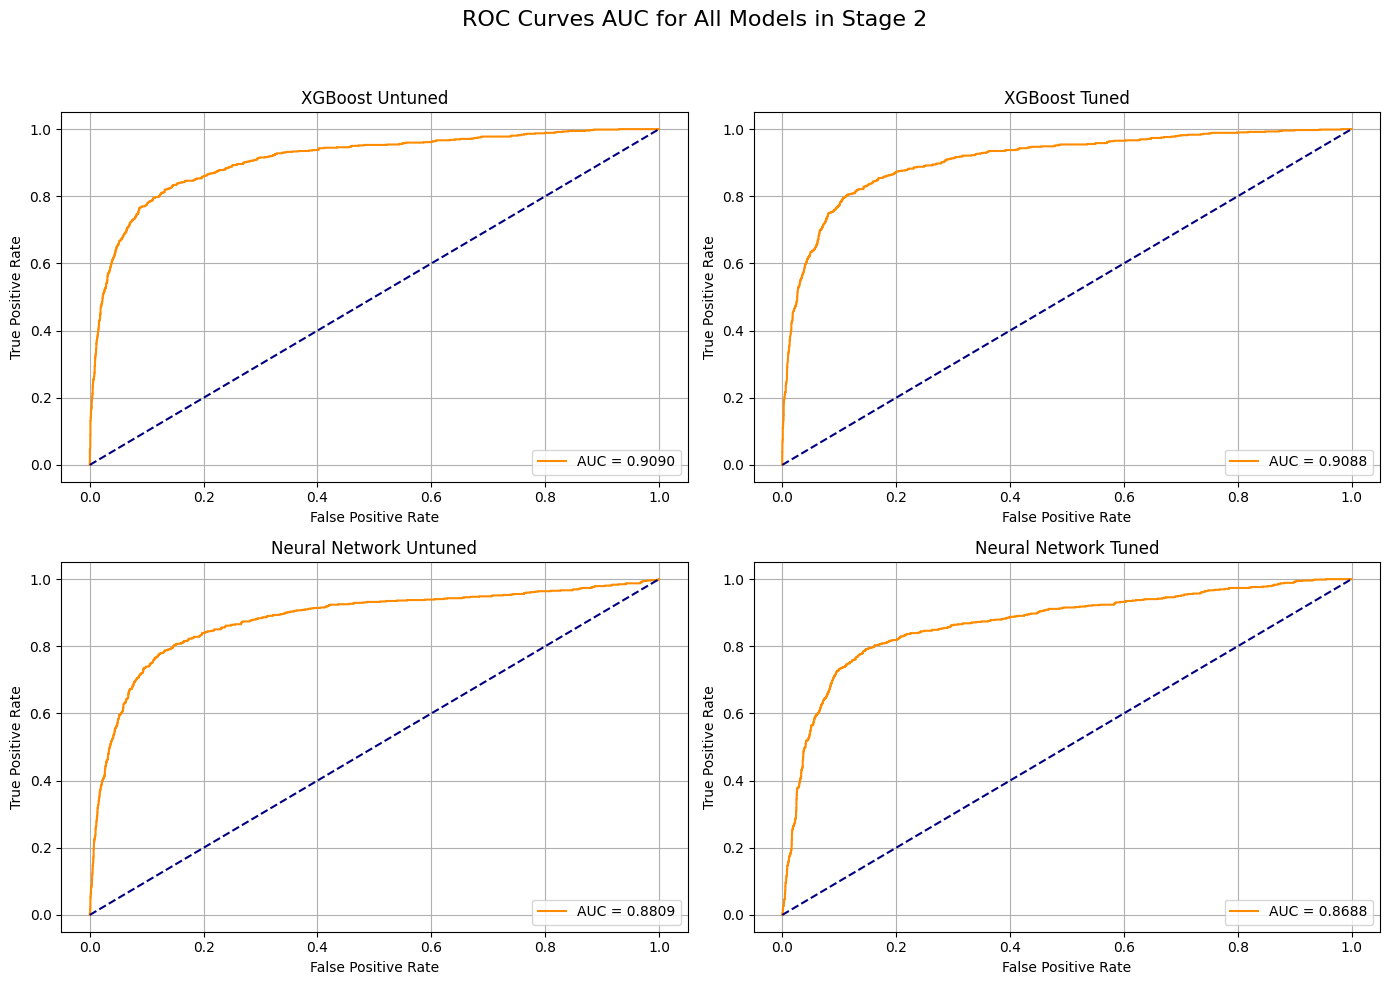

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
probs_xgb_untuned = xg_model_2.predict_proba(X_test)[:, 1]
probs_xgb_tuned = best_xg_model.predict_proba(X_test)[:, 1]
probs_nn_untuned = model_NN_2.predict(X_test_scaled).flatten()
probs_nn_tuned = best_model.predict(X_test_scaled).flatten()

# Store true labels and predicted probs for each model
model_predictions = {
    'XGBoost Untuned': (y_test, probs_xgb_untuned),
    'XGBoost Tuned': (y_test, probs_xgb_tuned),
    'Neural Network Untuned': (y_test, probs_nn_untuned),
    'Neural Network Tuned': (y_test, probs_nn_tuned)
}

# Plot ROC curves
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('ROC Curves AUC for All Models in Stage 2', fontsize=16)
axs = axs.flatten()

for i, (model_name, (y_true, y_score)) in enumerate(model_predictions.items()):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    axs[i].plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', color='darkorange')
    axs[i].plot([0, 1], [0, 1], linestyle='--', color='navy')
    axs[i].set_title(model_name)
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].legend(loc='lower right')
    axs[i].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In stage 2, which includes additional features like authorized and unauthorized absences, the untuned XGBoost model achieved the highest ROC curve AUC at 0.9090, showing excellent classification strength even without tuning. Surprisingly, the tuned XGBoost model slightly underperformed with an ROC curve AUC of 0.9088, suggesting the original settings were already close to optimal. The untuned neural network followed with an ROC curve AUC of 0.8809, performing well but lagging behind XGBoost. The tuned neural network, despite optimization, recorded the lowest ROC curve AUC at 0.8688.

## Stage 3

The same preprocessing steps applied in stages 1 and 2 were also used for the stage 3 dataset.

### Stage 3 Data Preprocessing

In [23]:
# Import and view the first 5 rows of the DataFrame(data1).
data3 = pd.read_csv("https://drive.google.com/uc?id=18oyu-RQotQN6jaibsLBoPdqQJbj_cV2-")
# View the data
print(data3.shape)
data3.head()

(25059, 21)


,CentreName,LearnerCode,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,...,CourseName,IsFirstIntake,CompletedCourse,AssessedModules,PassedModules,FailedModules,ProgressionDegree,ProgressionUniversity,AuthorisedAbsenceCount,UnauthorisedAbsenceCount
0,ISC_Aberdeen,2284932,Agent,Standard Agent Booking,NaN,13/01/1998,Male,Chinese,Jianye District; Jiangsu Province,Nanjing,...,Business and Law Pre-Masters,True,Yes,4.0,4.0,0.0,Msc Econ Accounting and Investment Management,University of Aberdeen,NaN,NaN
1,ISC_Aberdeen,2399500,Agent,Standard Agent Booking,NaN,12/2/1998,Male,Chinese,NaN,Xi'an,...,Life Sciences Undergraduate Foundation Programme,False,Yes,7.0,7.0,0.0,BSc Biological Sciences,University of Aberdeen,93.0,5.0
2,ISC_Aberdeen,2424946,Agent,Standard Agent Booking,NaN,7/4/2000,Male,Chinese,NaN,Chengdu,...,Business Management and Finance International ...,False,Yes,8.0,8.0,0.0,MA Finance,University of Aberdeen,92.0,6.0
3,ISC_Aberdeen,2426583,Agent,Standard Agent Booking,NaN,18/05/1999,Male,Chinese,NaN,LIUYANG CITY ;CHANGSHA,...,Business Management and Finance International ...,True,Yes,8.0,8.0,0.0,MA Business Management,University of Aberdeen,67.0,15.0
4,ISC_Aberdeen,2434674,Agent,Standard Agent Booking,NaN,19/04/1996,Male,Chinese,NaN,Xiamen,...,Business and Law Pre-Masters,True,Yes,4.0,4.0,0.0,MSc International Business Management,University of Aberdeen,NaN,NaN


In [24]:
# File URL
#file_url = "https://drive.google.com/uc?id=18oyu-RQotQN6jaibsLBoPdqQJbj_cV2-"

In [25]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CentreName                25059 non-null  object 
 1   LearnerCode               25059 non-null  int64  
 2   BookingType               25059 non-null  object 
 3   LeadSource                25059 non-null  object 
 4   DiscountType              7595 non-null   object 
 5   DateofBirth               25059 non-null  object 
 6   Gender                    25059 non-null  object 
 7   Nationality               25059 non-null  object 
 8   HomeState                 8925 non-null   object 
 9   HomeCity                  21611 non-null  object 
 10  CourseLevel               25059 non-null  object 
 11  CourseName                25059 non-null  object 
 12  IsFirstIntake             25059 non-null  bool   
 13  CompletedCourse           25059 non-null  object 
 14  Assess

In [26]:
data3.describe()

,LearnerCode,AssessedModules,PassedModules,FailedModules,AuthorisedAbsenceCount,UnauthorisedAbsenceCount
count,2.505900e+04,22828.000000,22828.000000,22828.000000,24851.000000,24851.000000
mean,2.606594e+06,6.090328,5.582881,0.507447,15.120639,40.491892
std,8.798838e+04,1.811116,2.361530,1.304677,28.918253,39.029384
min,2.139267e+06,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.538411e+06,4.000000,4.000000,0.000000,0.000000,12.000000
50%,2.607941e+06,6.000000,6.000000,0.000000,1.000000,29.000000
75%,2.665460e+06,7.000000,7.000000,0.000000,15.000000,56.000000
max,2.831468e+06,12.000000,11.000000,10.000000,292.000000,343.000000


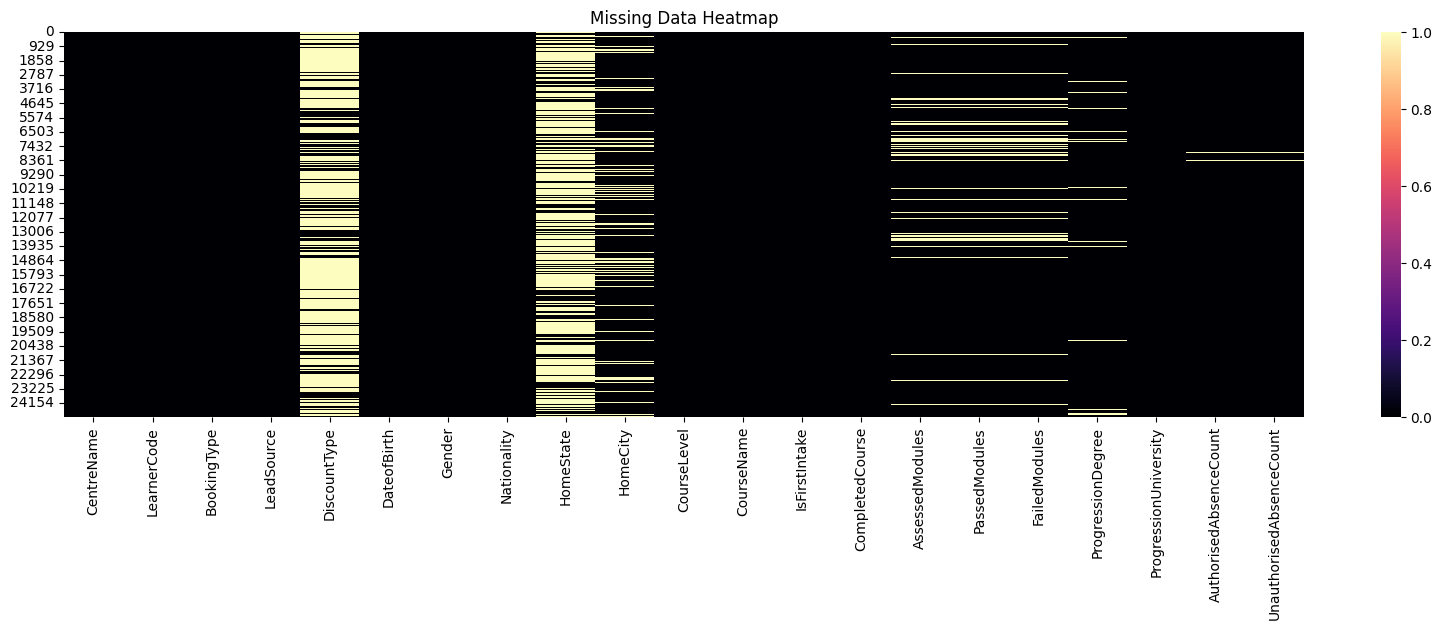

In [27]:
# Check for missing data
data3.isnull().sum()

# Visualize the missing data
plt.figure(figsize=(20, 5))
sns.heatmap(data3.isnull(), cbar=True, cmap='magma')
plt.title('Missing Data Heatmap')
plt.show()

#### Remove any columns that are not useful

In [28]:
# remove columns that are not useful (Learnerscode)
data3=data3.drop(columns=['LearnerCode'])
print(data3.shape)
data3.head()

(25059, 20)


,CentreName,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,AssessedModules,PassedModules,FailedModules,ProgressionDegree,ProgressionUniversity,AuthorisedAbsenceCount,UnauthorisedAbsenceCount
0,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,13/01/1998,Male,Chinese,Jianye District; Jiangsu Province,Nanjing,Pre-Masters,Business and Law Pre-Masters,True,Yes,4.0,4.0,0.0,Msc Econ Accounting and Investment Management,University of Aberdeen,NaN,NaN
1,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,12/2/1998,Male,Chinese,NaN,Xi'an,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,7.0,7.0,0.0,BSc Biological Sciences,University of Aberdeen,93.0,5.0
2,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,7/4/2000,Male,Chinese,NaN,Chengdu,International Year Two,Business Management and Finance International ...,False,Yes,8.0,8.0,0.0,MA Finance,University of Aberdeen,92.0,6.0
3,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,18/05/1999,Male,Chinese,NaN,LIUYANG CITY ;CHANGSHA,International Year Two,Business Management and Finance International ...,True,Yes,8.0,8.0,0.0,MA Business Management,University of Aberdeen,67.0,15.0
4,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,19/04/1996,Male,Chinese,NaN,Xiamen,Pre-Masters,Business and Law Pre-Masters,True,Yes,4.0,4.0,0.0,MSc International Business Management,University of Aberdeen,NaN,NaN


#### Remove columns with high cardinality (any column with more that 200 unique values)

In [29]:
# Create an 'Age' column
data3['DateofBirth'] = pd.to_datetime(data3['DateofBirth'])
data3['Age'] = datetime.today().year - data3['DateofBirth'].dt.year
print(data3.shape)
data3.head()

(25059, 21)


,CentreName,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,CourseLevel,...,IsFirstIntake,CompletedCourse,AssessedModules,PassedModules,FailedModules,ProgressionDegree,ProgressionUniversity,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,Age
0,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,1998-01-13,Male,Chinese,Jianye District; Jiangsu Province,Nanjing,Pre-Masters,...,True,Yes,4.0,4.0,0.0,Msc Econ Accounting and Investment Management,University of Aberdeen,NaN,NaN,27
1,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,1998-02-12,Male,Chinese,NaN,Xi'an,Foundation,...,False,Yes,7.0,7.0,0.0,BSc Biological Sciences,University of Aberdeen,93.0,5.0,27
2,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,2000-04-07,Male,Chinese,NaN,Chengdu,International Year Two,...,False,Yes,8.0,8.0,0.0,MA Finance,University of Aberdeen,92.0,6.0,25
3,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,1999-05-18,Male,Chinese,NaN,LIUYANG CITY ;CHANGSHA,International Year Two,...,True,Yes,8.0,8.0,0.0,MA Business Management,University of Aberdeen,67.0,15.0,26
4,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,1996-04-19,Male,Chinese,NaN,Xiamen,Pre-Masters,...,True,Yes,4.0,4.0,0.0,MSc International Business Management,University of Aberdeen,NaN,NaN,29


In [30]:
# Drop columns with high cardinality (with unique values greater than 200) for nonnumerical columns
high_cardinality_cols = data3.select_dtypes(exclude='number').nunique()[data3.select_dtypes(exclude='number').nunique() > 200].index

# Identify columns with high cardinality
#high_cardinality_cols = data3.nunique()[data3.nunique() > 200].index

# Drop the identified columns
data3.drop(high_cardinality_cols, axis=1, inplace=True)

print(data3.shape)
data3.head()

(25059, 17)


,CentreName,BookingType,LeadSource,DiscountType,Gender,Nationality,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,AssessedModules,PassedModules,FailedModules,ProgressionUniversity,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,Age
0,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,Yes,4.0,4.0,0.0,University of Aberdeen,NaN,NaN,27
1,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,Male,Chinese,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,7.0,7.0,0.0,University of Aberdeen,93.0,5.0,27
2,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,Male,Chinese,International Year Two,Business Management and Finance International ...,False,Yes,8.0,8.0,0.0,University of Aberdeen,92.0,6.0,25
3,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,Male,Chinese,International Year Two,Business Management and Finance International ...,True,Yes,8.0,8.0,0.0,University of Aberdeen,67.0,15.0,26
4,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,Yes,4.0,4.0,0.0,University of Aberdeen,NaN,NaN,29


#### Remove columns with >50% data missing.

In [31]:
# Drop columns with more than 50% data missing
missing_percentage = data3.isnull().mean() * 100
columns_to_drop = missing_percentage[missing_percentage > 50].index
data3.drop(columns_to_drop, axis=1, inplace=True)

print(data3.shape)
data3.head()

(25059, 16)


,CentreName,BookingType,LeadSource,Gender,Nationality,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,AssessedModules,PassedModules,FailedModules,ProgressionUniversity,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,Age
0,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,Yes,4.0,4.0,0.0,University of Aberdeen,NaN,NaN,27
1,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,7.0,7.0,0.0,University of Aberdeen,93.0,5.0,27
2,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,International Year Two,Business Management and Finance International ...,False,Yes,8.0,8.0,0.0,University of Aberdeen,92.0,6.0,25
3,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,International Year Two,Business Management and Finance International ...,True,Yes,8.0,8.0,0.0,University of Aberdeen,67.0,15.0,26
4,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,Yes,4.0,4.0,0.0,University of Aberdeen,NaN,NaN,29


#### Perform ordinal encoding for ordinal data.

In [32]:
# Perform ordinal encoding on Ordinal column ('CourseLevel')

# Define the order of categories from lowest to highest
categories = [['Foundation', 'International Year One', 'International Year Two', 'Pre-Masters']]

encoder = OrdinalEncoder(categories=categories)
data3['CourseLevel_encoded'] = encoder.fit_transform(data3[['CourseLevel']])

drop_columns = ['CourseLevel']
data3.drop(drop_columns, axis=1, inplace=True)

print(data3.shape)
data3.head()

(25059, 16)


,CentreName,BookingType,LeadSource,Gender,Nationality,CourseName,IsFirstIntake,CompletedCourse,AssessedModules,PassedModules,FailedModules,ProgressionUniversity,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,Age,CourseLevel_encoded
0,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Business and Law Pre-Masters,True,Yes,4.0,4.0,0.0,University of Aberdeen,NaN,NaN,27,3.0
1,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Life Sciences Undergraduate Foundation Programme,False,Yes,7.0,7.0,0.0,University of Aberdeen,93.0,5.0,27,0.0
2,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Business Management and Finance International ...,False,Yes,8.0,8.0,0.0,University of Aberdeen,92.0,6.0,25,2.0
3,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Business Management and Finance International ...,True,Yes,8.0,8.0,0.0,University of Aberdeen,67.0,15.0,26,2.0
4,ISC_Aberdeen,Agent,Standard Agent Booking,Male,Chinese,Business and Law Pre-Masters,True,Yes,4.0,4.0,0.0,University of Aberdeen,NaN,NaN,29,3.0


Perform One-hot encoding for all other categorical dataset.

In [33]:
# Identify categorical data in the data set
categorical_columns = data3.select_dtypes(include=['object']).columns

# Perform one-hot encoding on categorical columns
data3 = pd.get_dummies(data3, columns=categorical_columns, drop_first=True)

print(data3.shape)
data3.head()

(25059, 395)


,IsFirstIntake,AssessedModules,PassedModules,FailedModules,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,Age,CourseLevel_encoded,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,...,ProgressionUniversity_University College Dublin,ProgressionUniversity_University of Aberdeen,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam
0,True,4.0,4.0,0.0,NaN,NaN,27,3.0,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,7.0,7.0,0.0,93.0,5.0,27,0.0,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,8.0,8.0,0.0,92.0,6.0,25,2.0,False,False,...,False,True,False,False,False,False,False,False,False,False
3,True,8.0,8.0,0.0,67.0,15.0,26,2.0,False,False,...,False,True,False,False,False,False,False,False,False,False
4,True,4.0,4.0,0.0,NaN,NaN,29,3.0,False,False,...,False,True,False,False,False,False,False,False,False,False


#### Handle missing values

In [34]:
# Check number and percentage of rows with missing value.
missing_rows = data3[data3.isnull().any(axis=1)]
missing_rows_percentage = (missing_rows.shape[0] / data3.shape[0]) * 100



print(f"Number of rows with missing values: {missing_rows.shape[0]}")
print(f"Percentage of rows with missing values: {missing_rows_percentage:.2f}%")

Number of rows with missing values: 2310
Percentage of rows with missing values: 9.22%


Because missing rows exceeded the limit of 2 percent we will replace missing rows with appropriate values

In [35]:
# Replace rows having missing values with appropriate values

In [36]:
# view count of missing rows
data3.isnull().sum().sort_values(ascending=False)
print(data3.isnull().sum().sort_values(ascending=False).head(20))

AssessedModules                                                                                             2231
PassedModules                                                                                               2231
FailedModules                                                                                               2231
AuthorisedAbsenceCount                                                                                       208
UnauthorisedAbsenceCount                                                                                     208
CourseName_International Foundation Year Business; Humanities Social Sciences and Law (ICAS) (2.5 Terms)       0
CourseName_International Foundation Year Business; Management and Law (November Intake)                        0
CourseName_International Foundation Year Business; Media and Social Sciences                                   0
CourseName_International Foundation Year Business; Social Sciences and Humanities               

In [37]:
# Replace Missing Data with in numeric column with median
data3.fillna(data3.median(), inplace=True)


In [38]:
# view count of missing rows
data3.isnull().sum().sort_values(ascending=False)
print(data3.isnull().sum().sort_values(ascending=False).head(20))

ProgressionUniversity_VU Amsterdam                                                              0
IsFirstIntake                                                                                   0
AssessedModules                                                                                 0
PassedModules                                                                                   0
FailedModules                                                                                   0
AuthorisedAbsenceCount                                                                          0
UnauthorisedAbsenceCount                                                                        0
Age                                                                                             0
CourseLevel_encoded                                                                             0
CentreName_ISC_Cardiff                                                                          0
CentreName_ISC_Dubli

In [39]:
print(data3.shape)
data3.head()

(25059, 395)


,IsFirstIntake,AssessedModules,PassedModules,FailedModules,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,Age,CourseLevel_encoded,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,...,ProgressionUniversity_University College Dublin,ProgressionUniversity_University of Aberdeen,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam
0,True,4.0,4.0,0.0,1.0,29.0,27,3.0,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,7.0,7.0,0.0,93.0,5.0,27,0.0,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,8.0,8.0,0.0,92.0,6.0,25,2.0,False,False,...,False,True,False,False,False,False,False,False,False,False
3,True,8.0,8.0,0.0,67.0,15.0,26,2.0,False,False,...,False,True,False,False,False,False,False,False,False,False
4,True,4.0,4.0,0.0,1.0,29.0,29,3.0,False,False,...,False,True,False,False,False,False,False,False,False,False


#### Convert target variable from string to binary encoding

In [40]:
# Create 'dropout' column: 1 if student dropped out, 0 if they completed the course
data3['dropout'] = 1 - data3['CompletedCourse_Yes']

# Display both columns
data3[['dropout', 'CompletedCourse_Yes']]

,dropout,CompletedCourse_Yes
0,0,True
1,0,True
2,0,True
3,0,True
4,0,True
...,...,...
25054,0,True
25055,0,True
25056,0,True
25057,1,False


In [41]:
# Drop the 'CourseLevel' Column
data3.drop('CompletedCourse_Yes', axis=1, inplace=True)

print(data3.shape)
data3.head()

(25059, 395)


,IsFirstIntake,AssessedModules,PassedModules,FailedModules,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,Age,CourseLevel_encoded,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,...,ProgressionUniversity_University of Aberdeen,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam,dropout
0,True,4.0,4.0,0.0,1.0,29.0,27,3.0,False,False,...,True,False,False,False,False,False,False,False,False,0
1,False,7.0,7.0,0.0,93.0,5.0,27,0.0,False,False,...,True,False,False,False,False,False,False,False,False,0
2,False,8.0,8.0,0.0,92.0,6.0,25,2.0,False,False,...,True,False,False,False,False,False,False,False,False,0
3,True,8.0,8.0,0.0,67.0,15.0,26,2.0,False,False,...,True,False,False,False,False,False,False,False,False,0
4,True,4.0,4.0,0.0,1.0,29.0,29,3.0,False,False,...,True,False,False,False,False,False,False,False,False,0


#### Checking for inbalace in the target variable

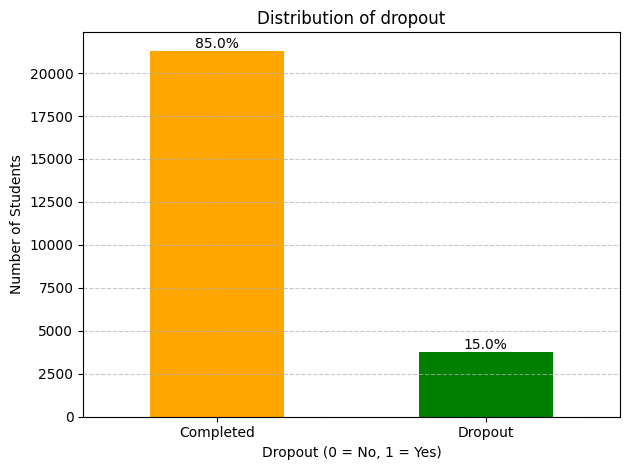

In [42]:
# Calculate class counts and percentages
counts = data3['dropout'].value_counts().sort_index()
percentages = counts / counts.sum() * 100

# Plot the bar chart
ax = counts.plot(kind='bar', color=['orange', 'green'])

# Add title and labels
plt.title('Distribution of dropout')
plt.xlabel('Dropout (0 = No, 1 = Yes)')
plt.ylabel('Number of Students')
plt.xticks([0, 1], ['Completed', 'Dropout'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on top of bars
for i, (count, pct) in enumerate(zip(counts, percentages)):
    plt.text(i, count + 1, f'{pct:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### **XGBoost Model**

#### Split dataset into training and test set for training

In [43]:
# Seperate the dataset into data for processing (X) and target out come (Y)
X = data3.drop(['dropout'], axis=1)
y = data3['dropout']

print(X.shape)
print(y.shape)

# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

(25059, 394)
(25059,)


#### XGBoost

XGBoost Classifier Performance
Accuracy: 0.9714684756584198
Precision: 0.9208333333333333
Recall: 0.8851802403204272
F1 Score: 0.9026548672566371
AUC-ROC: 0.9359046873664064
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4263
           1       0.92      0.89      0.90       749

    accuracy                           0.97      5012
   macro avg       0.95      0.94      0.94      5012
weighted avg       0.97      0.97      0.97      5012



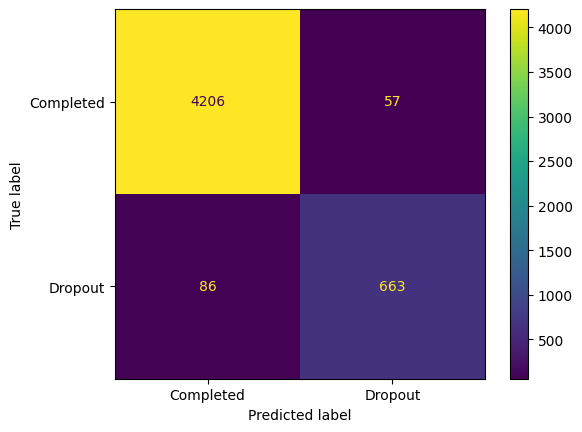

In [44]:
# Define the model
xg_model_3 = xgb.XGBClassifier(random_state=42)
xg_model_3.fit(X_train, y_train)

# Model evaluation
predictions_xgb_untuned_3 = xg_model_3.predict(X_test)

# Print evaluation metrics
print('XGBoost Classifier Performance')
print('Accuracy:', accuracy_score(y_test, predictions_xgb_untuned_3))
print('Precision:', precision_score(y_test, predictions_xgb_untuned_3))
print('Recall:', recall_score(y_test, predictions_xgb_untuned_3))
print('F1 Score:', f1_score(y_test, predictions_xgb_untuned_3))
print('AUC-ROC:', roc_auc_score(y_test, predictions_xgb_untuned_3))

#print("XGBoost Model Accuracy: ", accuracy_score(y_test, predictions_xgb_untuned_3))
print(classification_report(y_test, predictions_xgb_untuned_3))


cm = confusion_matrix(y_test, predictions_xgb_untuned_3)
cfmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Completed","Dropout"])
cfmd.plot()
plt.show()

The Stage 3 XGBoost model demonstrates outstanding classification performance, achieving an Classification AUC score of 93%, indicating near-perfect ability to distinguish between Dropout and Completed classes. With an accuracy of 97.15, precision of 92.08%, recall of 88.52%, and an F1-score of 90.27%, the model excels in ranking Dropout instances while maintaining a low false Dropout rate due to the additionl data provided. Class-specific metrics reveal strong performance for both classes— Completed Class shows near-flawless precision (98%) and recall (99%), while Dropout Class exhibits slightly lower recall (89%) still pointing to the class imbalance in the dataset.

#### Feature importance XGBoost

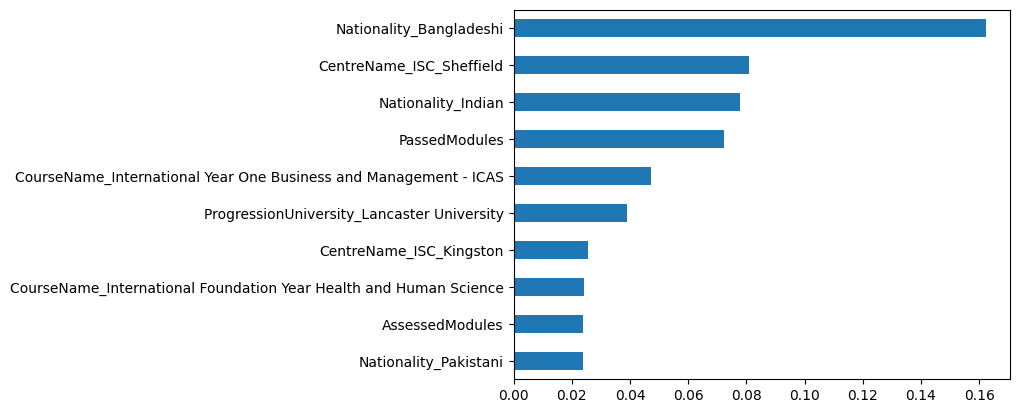

In [45]:
# Feature importance for XGBoost model Stage 3 data

# Use the columns from the original X DataFrame (before scaling)
feature_importance = pd.Series(xg_model_3.feature_importances_, index=X_train.columns).sort_values()

feature_importance.iloc[-10:].plot.barh()
plt.show()



***Hyperparameter tuning was not required per the mini project rubric, however to further optimizing the XGBoost model tuning could further improve its ability to identify the dropout class.***

### **Neural Network**

before building the network we will scale the data set as neural networks are sensitive to unscaled data

In [30]:
# Scale the data set for training the neural network
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(20047, 394)
(5012, 394)
(20047,)
(5012,)


Epoch 1/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.8368 - loss: 0.5336 - val_accuracy: 0.9042 - val_loss: 0.3332
Epoch 2/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.9094 - loss: 0.3144 - val_accuracy: 0.9120 - val_loss: 0.2871
Epoch 3/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.9274 - loss: 0.2456 - val_accuracy: 0.9247 - val_loss: 0.2483
Epoch 4/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.9421 - loss: 0.2027 - val_accuracy: 0.9466 - val_loss: 0.2032
Epoch 5/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.9560 - loss: 0.1668 - val_accuracy: 0.9509 - val_loss: 0.1948
Epoch 6/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 27s 54ms/step - accuracy: 0.9634 - loss: 0.1352 - val_accuracy: 0.9524 - val_loss: 0.1847
Epoch 7/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 27s 55ms/step - accuracy: 0.9659 - loss: 0.1233 - val_accuracy: 0.9534 - val_loss: 0.1715
Epoch 8/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 27s 55ms/step - accuracy: 0.9706 - loss: 0.1084 - 

<Figure size 1200x500 with 0 Axes>

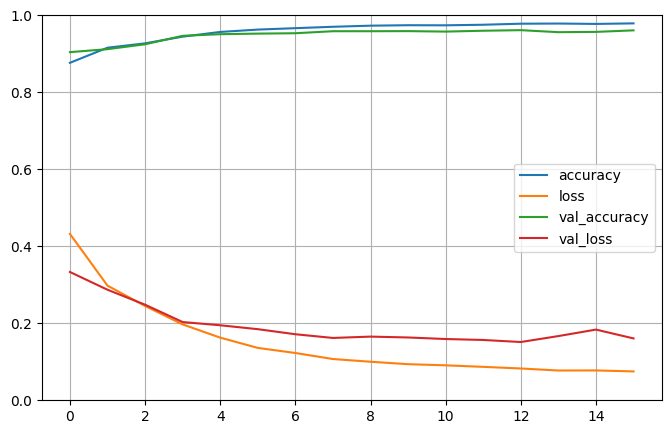

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Classification Report Untuned Neural Net Model:
Accuracy: 0.9660814046288907
Precision: 0.9314456035767511
Recall: 0.8344459279038718
F1 Score: 0.8802816901408451
AUC-ROC: 0.9118277023990389
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4263
           1       0.93      0.83      0.88       749

    accuracy                           0.97      5012
   macro avg       0.95      0.91      0.93      5012
weighted avg       0.97      0.97      0.97      5012



<Figure size 600x600 with 0 Axes>

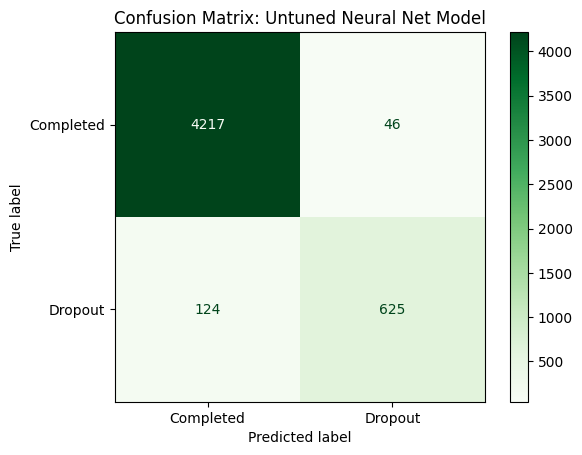

In [34]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import keras # Import keras
# Define a function to create and compile a neural network model, with regulizers and dropout.
def create_model():
    model = Sequential()

    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

    model.add(Dense(128, activation='relu',  kernel_regularizer=l2(0.001)))  # First hidden layer
    model.add(Dropout(0.5))  # Dropout layer

    model.add(Dense(64, activation='relu',  kernel_regularizer=l2(0.001)))  # Second hidden layer
    model.add(Dropout(0.5))  # Dropout layer

    model.add(Dense(1, activation='sigmoid'))  # Output layer

    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define function to train the model and return history.
model_NN_3 = create_model()
history = model_NN_3.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stopping])

# Plot training history
plt.figure(figsize=(12, 5))

# Plot the key metrics in a pandas dataframe.
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Set the vertical range to [0-1].
plt.show()

# Evaluate on test set
y_pred_prob = model_NN_3.predict(X_test)
y_pred_untuned_neural_data3 = (y_pred_prob > 0.5).astype(int)

# Print classification report
print("\nClassification Report Untuned Neural Net Model:")
print('Accuracy:', accuracy_score(y_test, y_pred_untuned_neural_data3))
print('Precision:', precision_score(y_test, y_pred_untuned_neural_data3))
print('Recall:', recall_score(y_test, y_pred_untuned_neural_data3))
print('F1 Score:', f1_score(y_test, y_pred_untuned_neural_data3))
print('AUC-ROC:', roc_auc_score(y_test, y_pred_untuned_neural_data3))
print(classification_report(y_test, y_pred_untuned_neural_data3))


# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_untuned_neural_data3)

# Define class labels (0 = Completed, 1 = Dropout)
labels = ["Completed", "Dropout"]

# Plot using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
plt.figure(figsize=(6, 6))
disp.plot(cmap='Greens')
plt.title("Confusion Matrix: Untuned Neural Net Model")
plt.show()

The simple neural network demonstrates also strong classification performance, achieving an AUC-ROC score of 0.9118, due to the additional features provided. The classification report highlights high precision (93% for Dropout Class) and solid recall (0.83 for Dropout Class), meaning the model correctly identifies 93% of predicted positives while capturing 83% of all actual positives. The F1-score (0.88 for Dropout Class) further reflects a balanced trade-off between precision and recall. While the model already performs well, fine-tuning—such as adjusting class weights or optimizing hyperparameters—could further enhance recall for the minority class.

#### ROC curve for stage 3 model

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


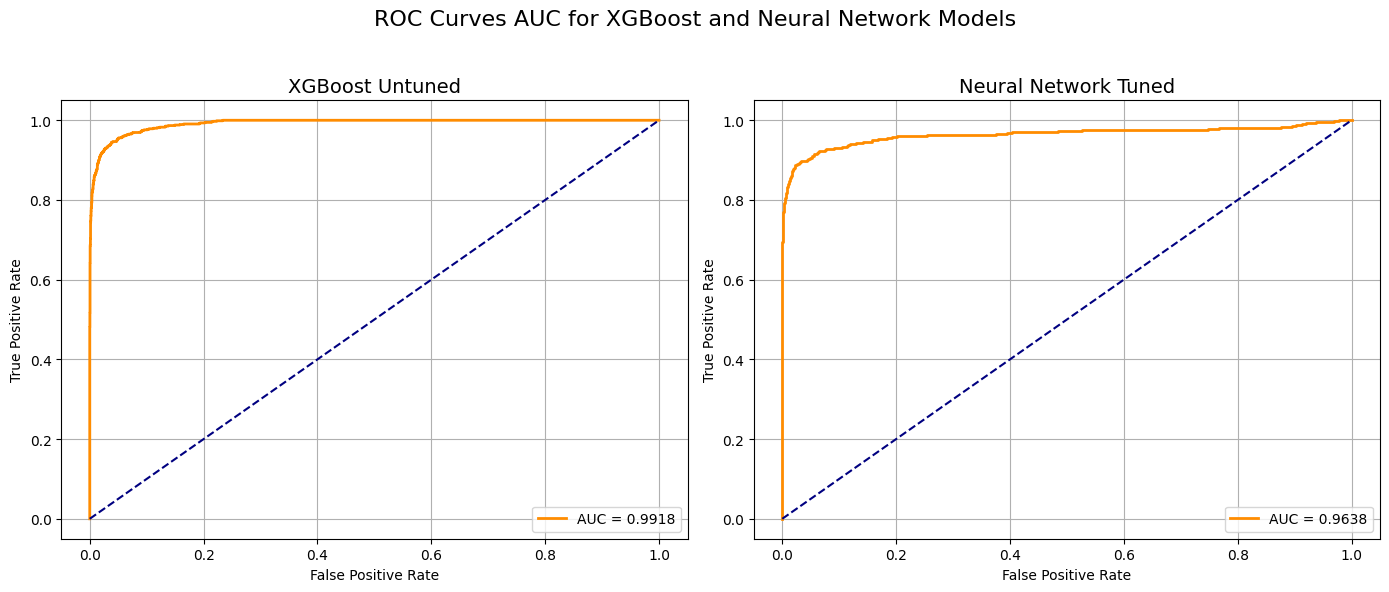

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities from each model
probs_xgb_untuned = xg_model_3.predict_proba(X_test)[:, 1]  # Ensure this pulls correct column
probs_nn_untuned = model_NN_3.predict(X_test).flatten()  # Fix dimension mismatch

# Store true labels and predicted probabilities
model_predictions = {
    'XGBoost Untuned': (y_test, probs_xgb_untuned),
    'Neural Network Tuned': (y_test, probs_nn_untuned)
}

# Plot ROC curves
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # Adjust layout for better visualization
fig.suptitle('ROC Curves AUC for XGBoost and Neural Network Models', fontsize=16)

for i, (model_name, (y_true, y_score)) in enumerate(model_predictions.items()):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    axs[i].plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', color='darkorange', linewidth=2)
    axs[i].plot([0, 1], [0, 1], linestyle='--', color='navy')
    axs[i].set_title(model_name, fontsize=14)
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].legend(loc='lower right')
    axs[i].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Optimize spacing
plt.show()

The ROC-AUC plots reveal a distinct performance disparity between the two models: XGBoost scored at 99% versus the neural network at 96%. The models both got better with added data in each of the three stages—demographics and course data in Stage 1, attendance in Stage 2, and performance in Stage 3—but XGBoost had a more dramatic reaction to enriched input. Its architecture is optimized for structured tabular data and can accommodate categorical and numerical variables without heavy preprocessing.


#### **Compare the results of the XGBOOST and Neural network models on the Stage 3 dataset Vs the Stage 2 dataset**

The additional data provided in stage 3 data set yielded significant performance improvements for both the XGBoost and neural network models, primarily driven by the inclusion of academic performance features (assessed, passed, and failed modules). XGBoost demonstrated particularly strong gains, with its Classification AUC jumping from 0.844 to 0.936, recall increasing from 0.80 to 0.89, F1 score rising from 0.65 to 0.90, and precision improving dramatically from 0.54 to 0.92 - indicating its exceptional ability to leverage the new academic data for both accurate identification of dropouts and minimization of false positives. The neural network also showed meaningful progress, with Classification AUC improving from 0.816 to 0.912 and precision surging from 0.53 to 0.93, though its overall gains were slightly less compared to XGBoost.

### **Reason for Diffrence in results**

The gain in performance from Stage 2 to Stage 3 for both XGBoost and the neural network originates from the incorporation of academic performance features—AssessedModule, PassedModules, and FailedModules—that are direct, numerical measures of student effort and achievement. The features presented more distinct signals when paired with demographic and behavioral variables, enabling the models to better predict at-risk dropouts. XGBoost handled the structured and numeric data effectively by compactly building rules for decisions by utilizing the predictive ability of introduced features. The neural network also benefited, though not as much, since its deep architecture can weaken signals from individual features.